🚀 Starting LiTS dataset reorganization...
🚀 **STARTING LITS DATASET REORGANIZATION**
📂 **CONFIGURATION:**
  Input CT Directory: /kaggle/input/litsdataset2/images
  Input Mask Directory: /kaggle/input/litsdataset2/masks
  Output Directory: /kaggle/working/reorganized_lits
  Target Patients: 21
🔄 **LiTS Dataset Reorganizer Initialized**
  Input CT Directory: /kaggle/input/litsdataset2/images
  Input Mask Directory: /kaggle/input/litsdataset2/masks
  Output Base Directory: /kaggle/working/reorganized_lits
  Target Patients: 21

📊 **ANALYZING CURRENT DATASET STRUCTURE**
  Total CT files found: 58638
  Total mask files found: 58638

📋 **DATASET ANALYSIS RESULTS:**
  Unique patients found: 131
  Available for reorganization: 21 patients

📊 **PATIENT SLICE DISTRIBUTION (First 10):**
  Patient 000: 75 CT slices, 75 mask slices
  Patient 001: 123 CT slices, 123 mask slices
  Patient 002: 517 CT slices, 517 mask slices
  Patient 003: 534 CT slices, 534 mask slices
  Patient 004: 841 CT slices, 8

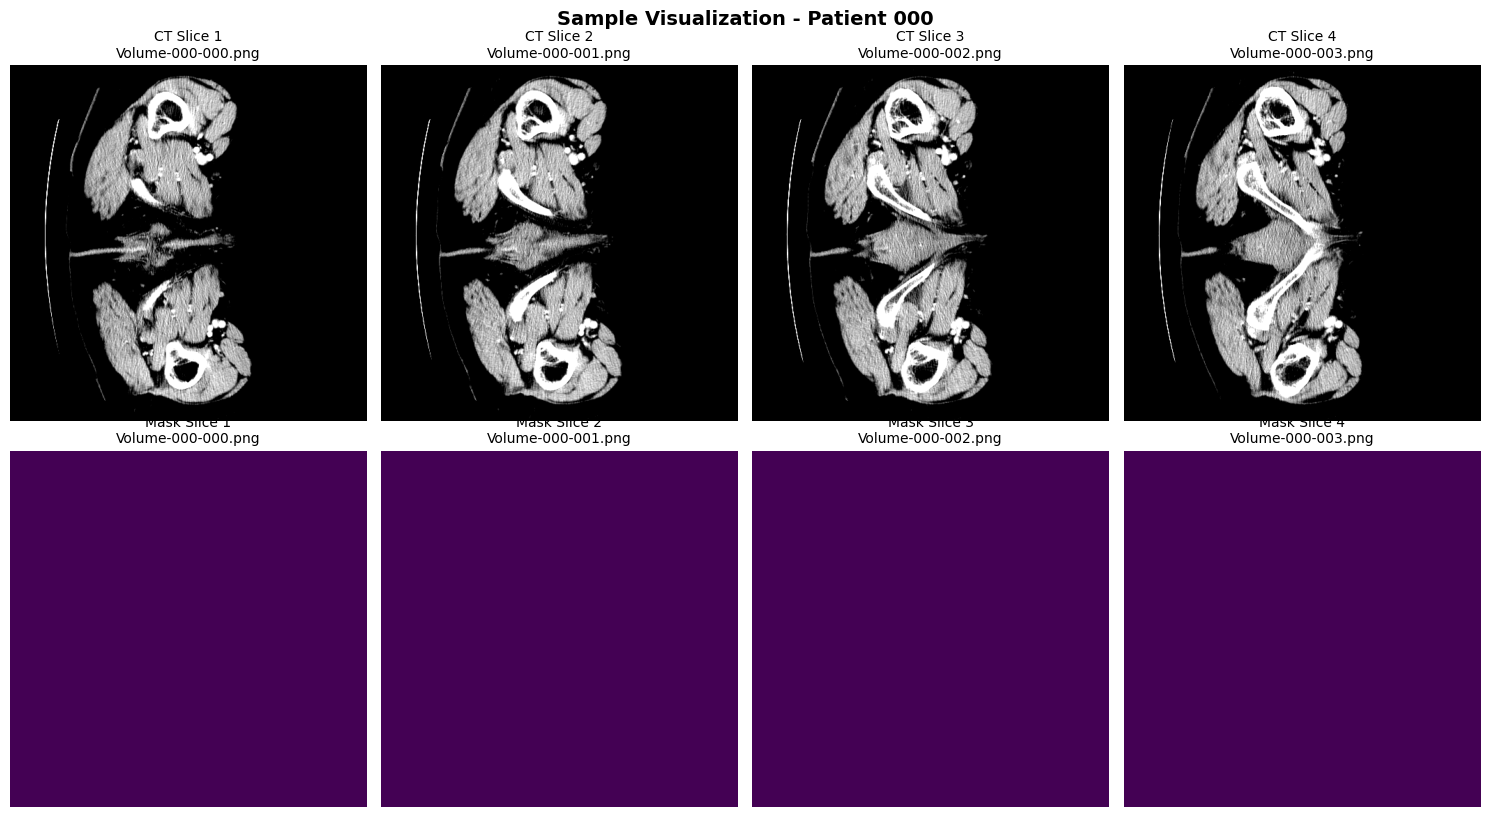

  ✅ Visualization saved to: /kaggle/working/reorganized_lits/sample_visualization_patient_000.png

📊 **GENERATING DATASET SUMMARY**

📋 **DATASET SUMMARY:**
  Total Patients: 21
  Total CT Files: 11437
  Total Mask Files: 11437
  Average CT Files per Patient: 544.6190476190476
  Average Mask Files per Patient: 544.6190476190476
  Min CT Files per Patient: 75
  Max CT Files per Patient: 845
  Patients with Perfect Matching: 21
  Success Rate: 100.0%


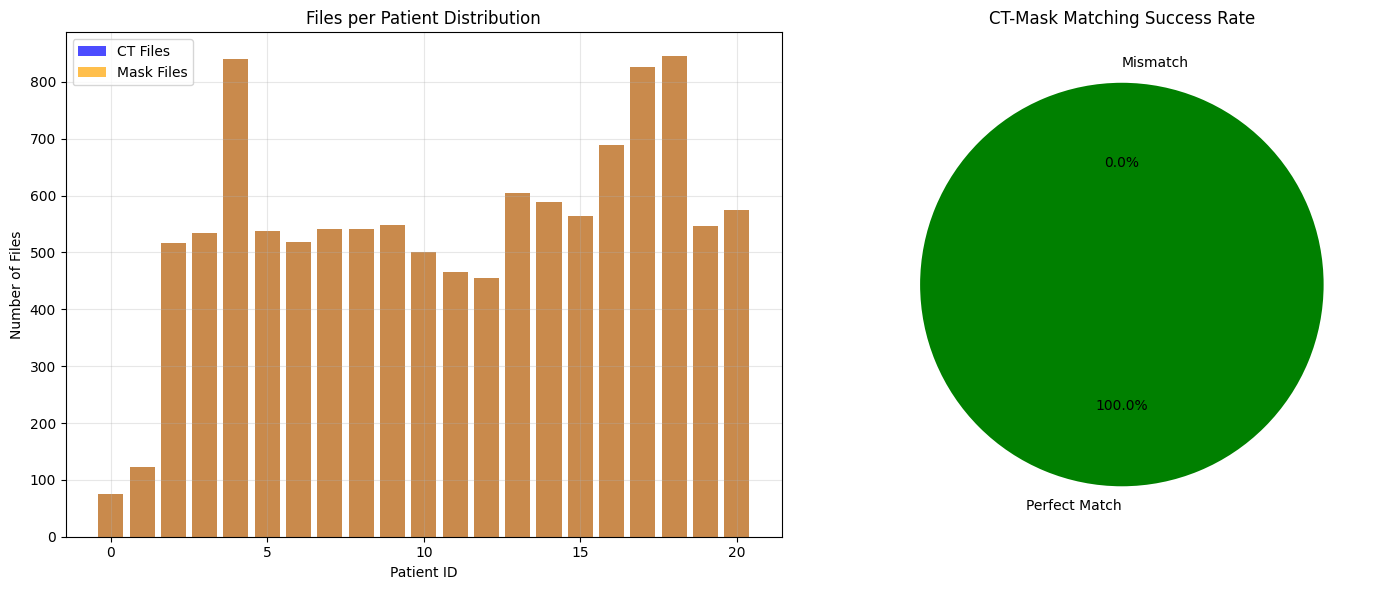

  ✅ Summary visualization saved: /kaggle/working/reorganized_lits/dataset_summary.png
  ✅ Summary text file saved: /kaggle/working/reorganized_lits/dataset_summary.txt

📦 **CREATING ZIP ARCHIVE**
  ✅ Zip archive created: /kaggle/working/reorganized_lits_21_patients.zip
  📊 Archive size: 765.22 MB

🎉 **LITS DATASET REORGANIZATION COMPLETED SUCCESSFULLY!**

📂 **OUTPUT STRUCTURE CREATED:**
  📁 /kaggle/working/reorganized_lits/
  ├── 📁 ct_scans/
  │   ├── 📁 patient_000/ (75 files)
  │   ├── 📁 patient_001/ (123 files)
  │   └── 📁 ... (21 total patients)
  ├── 📁 masks/
  │   ├── 📁 patient_000/ (75 files)
  │   ├── 📁 patient_001/ (123 files)
  │   └── 📁 ... (21 total patients)
  ├── 📊 dataset_summary.png
  ├── 📄 dataset_summary.txt
  └── 🎨 sample_visualization_patient_XXX.png

📊 **FINAL STATISTICS:**
  Total Patients: 21
  Total CT Files: 11437
  Total Mask Files: 11437
  Success Rate: 100.0%

📦 **DELIVERABLES:**
  ✅ Reorganized dataset folder: /kaggle/working/reorganized_lits
  ✅ Zip archive

In [1]:
# ============================================================
# 📦 COMPLETE LITS DATASET REORGANIZATION SYSTEM
# ============================================================
import os
import shutil
import glob
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import zipfile
from pathlib import Path

# ============================================================
# ⚙️ CONFIGURATION SETTINGS
# ============================================================
class LiTSReorganizer:
    def __init__(self, 
                 input_ct_dir="/kaggle/input/litsdataset2/images", 
                 input_mask_dir="/kaggle/input/litsdataset2/masks",
                 output_base_dir="/kaggle/working/reorganized_lits",
                 num_patients=21):
        
        self.input_ct_dir = input_ct_dir
        self.input_mask_dir = input_mask_dir
        self.output_base_dir = output_base_dir
        self.num_patients = num_patients
        
        # Output directory structure
        self.output_ct_dir = os.path.join(output_base_dir, "ct_scans")
        self.output_mask_dir = os.path.join(output_base_dir, "masks")
        
        print(f"🔄 **LiTS Dataset Reorganizer Initialized**")
        print(f"  Input CT Directory: {self.input_ct_dir}")
        print(f"  Input Mask Directory: {self.input_mask_dir}")
        print(f"  Output Base Directory: {self.output_base_dir}")
        print(f"  Target Patients: {self.num_patients}")
    
    def analyze_dataset_structure(self):
        """Analyze current dataset structure and file patterns"""
        print("\n📊 **ANALYZING CURRENT DATASET STRUCTURE**")
        
        # Get all CT scan files
        ct_files = []
        if os.path.exists(self.input_ct_dir):
            ct_files = [f for f in os.listdir(self.input_ct_dir) 
                       if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Get all mask files
        mask_files = []
        if os.path.exists(self.input_mask_dir):
            mask_files = [f for f in os.listdir(self.input_mask_dir) 
                         if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        print(f"  Total CT files found: {len(ct_files)}")
        print(f"  Total mask files found: {len(mask_files)}")
        
        # Analyze file naming pattern
        patient_stats = defaultdict(int)
        ct_pattern_analysis = defaultdict(list)
        
        for filename in ct_files:
            try:
                # Extract patient number from Volume-{VolumeNumber}-{SliceNumber}.png
                if filename.startswith("Volume-") and filename.endswith(".png"):
                    parts = filename.replace("Volume-", "").replace(".png", "").split("-")
                    if len(parts) >= 2:
                        patient_id = parts[0]
                        slice_id = parts[1]
                        patient_stats[patient_id] += 1
                        ct_pattern_analysis[patient_id].append(slice_id)
            except:
                continue
        
        # Same for mask files
        mask_pattern_analysis = defaultdict(list)
        for filename in mask_files:
            try:
                if filename.startswith("Volume-") and filename.endswith(".png"):
                    parts = filename.replace("Volume-", "").replace(".png", "").split("-")
                    if len(parts) >= 2:
                        patient_id = parts[0]
                        slice_id = parts[1]
                        mask_pattern_analysis[patient_id].append(slice_id)
            except:
                continue
        
        print(f"\n📋 **DATASET ANALYSIS RESULTS:**")
        print(f"  Unique patients found: {len(patient_stats)}")
        print(f"  Available for reorganization: {min(len(patient_stats), self.num_patients)} patients")
        
        # Show first few patients and their slice counts
        sorted_patients = sorted(patient_stats.items(), key=lambda x: int(x[0]))
        print(f"\n📊 **PATIENT SLICE DISTRIBUTION (First 10):**")
        for i, (patient_id, count) in enumerate(sorted_patients[:10]):
            mask_count = len(mask_pattern_analysis.get(patient_id, []))
            print(f"  Patient {patient_id}: {count} CT slices, {mask_count} mask slices")
        
        return sorted_patients, ct_pattern_analysis, mask_pattern_analysis
    
    def create_directory_structure(self):
        """Create the new directory structure"""
        print(f"\n📁 **CREATING DIRECTORY STRUCTURE**")
        
        # Create base directories
        os.makedirs(self.output_base_dir, exist_ok=True)
        os.makedirs(self.output_ct_dir, exist_ok=True)
        os.makedirs(self.output_mask_dir, exist_ok=True)
        
        # Create patient directories
        for patient_num in range(self.num_patients):
            patient_id = f"{patient_num:03d}"  # Format as 000, 001, 002, etc.
            
            ct_patient_dir = os.path.join(self.output_ct_dir, f"patient_{patient_id}")
            mask_patient_dir = os.path.join(self.output_mask_dir, f"patient_{patient_id}")
            
            os.makedirs(ct_patient_dir, exist_ok=True)
            os.makedirs(mask_patient_dir, exist_ok=True)
        
        print(f"  ✅ Created {self.num_patients} patient directories in CT scans folder")
        print(f"  ✅ Created {self.num_patients} patient directories in masks folder")
        
        # Print directory structure
        print(f"\n📂 **CREATED DIRECTORY STRUCTURE:**")
        print(f"  {self.output_base_dir}/")
        print(f"  ├── ct_scans/")
        for i in range(min(3, self.num_patients)):
            print(f"  │   ├── patient_{i:03d}/")
        if self.num_patients > 3:
            print(f"  │   ├── ... ({self.num_patients-3} more patients)")
        print(f"  └── masks/")
        for i in range(min(3, self.num_patients)):
            print(f"      ├── patient_{i:03d}/")
        if self.num_patients > 3:
            print(f"      └── ... ({self.num_patients-3} more patients)")
    
    def reorganize_files(self):
        """Reorganize files into patient-based structure"""
        print(f"\n🔄 **REORGANIZING FILES BY PATIENT**")
        
        # Get file analysis
        patient_data, ct_analysis, mask_analysis = self.analyze_dataset_structure()
        
        copied_files = {"ct": 0, "mask": 0}
        skipped_files = {"ct": 0, "mask": 0}
        patient_summary = {}
        
        # Process each patient
        for patient_num in range(self.num_patients):
            patient_id = f"{patient_num:03d}"
            
            print(f"\n  Processing Patient {patient_id}...")
            
            patient_ct_count = 0
            patient_mask_count = 0
            
            # Copy CT files for this patient
            if os.path.exists(self.input_ct_dir):
                ct_files = [f for f in os.listdir(self.input_ct_dir) 
                           if f.startswith(f"Volume-{patient_id}-") and f.lower().endswith('.png')]
                
                ct_patient_dir = os.path.join(self.output_ct_dir, f"patient_{patient_id}")
                
                for ct_file in ct_files:
                    src_path = os.path.join(self.input_ct_dir, ct_file)
                    dst_path = os.path.join(ct_patient_dir, ct_file)
                    
                    try:
                        shutil.copy2(src_path, dst_path)
                        patient_ct_count += 1
                        copied_files["ct"] += 1
                    except Exception as e:
                        print(f"    ⚠️ Failed to copy CT {ct_file}: {e}")
                        skipped_files["ct"] += 1
            
            # Copy mask files for this patient
            if os.path.exists(self.input_mask_dir):
                mask_files = [f for f in os.listdir(self.input_mask_dir) 
                             if f.startswith(f"Volume-{patient_id}-") and f.lower().endswith('.png')]
                
                mask_patient_dir = os.path.join(self.output_mask_dir, f"patient_{patient_id}")
                
                for mask_file in mask_files:
                    src_path = os.path.join(self.input_mask_dir, mask_file)
                    dst_path = os.path.join(mask_patient_dir, mask_file)
                    
                    try:
                        shutil.copy2(src_path, dst_path)
                        patient_mask_count += 1
                        copied_files["mask"] += 1
                    except Exception as e:
                        print(f"    ⚠️ Failed to copy mask {mask_file}: {e}")
                        skipped_files["mask"] += 1
            
            # Store patient summary
            patient_summary[patient_id] = {
                'ct_files': patient_ct_count,
                'mask_files': patient_mask_count
            }
            
            print(f"    ✅ Patient {patient_id}: {patient_ct_count} CT files, {patient_mask_count} mask files")
        
        print(f"\n📊 **REORGANIZATION SUMMARY:**")
        print(f"  Total CT files copied: {copied_files['ct']}")
        print(f"  Total mask files copied: {copied_files['mask']}")
        print(f"  Total CT files skipped: {skipped_files['ct']}")
        print(f"  Total mask files skipped: {skipped_files['mask']}")
        
        return patient_summary
    
    def validate_reorganization(self, patient_summary):
        """Validate the reorganized dataset"""
        print(f"\n✅ **VALIDATING REORGANIZED DATASET**")
        
        validation_results = []
        total_ct_files = 0
        total_mask_files = 0
        
        for patient_num in range(self.num_patients):
            patient_id = f"{patient_num:03d}"
            
            ct_patient_dir = os.path.join(self.output_ct_dir, f"patient_{patient_id}")
            mask_patient_dir = os.path.join(self.output_mask_dir, f"patient_{patient_id}")
            
            # Count files in patient directories
            ct_files = len([f for f in os.listdir(ct_patient_dir) if f.lower().endswith('.png')])
            mask_files = len([f for f in os.listdir(mask_patient_dir) if f.lower().endswith('.png')])
            
            total_ct_files += ct_files
            total_mask_files += mask_files
            
            validation_results.append({
                'patient_id': patient_id,
                'ct_files': ct_files,
                'mask_files': mask_files,
                'matching': ct_files == mask_files
            })
        
        # Create validation DataFrame
        df_validation = pd.DataFrame(validation_results)
        
        print(f"  📊 **VALIDATION RESULTS:**")
        print(f"    Total patients processed: {self.num_patients}")
        print(f"    Total CT files: {total_ct_files}")
        print(f"    Total mask files: {total_mask_files}")
        print(f"    Patients with matching CT/mask counts: {df_validation['matching'].sum()}")
        print(f"    Patients with mismatched counts: {(~df_validation['matching']).sum()}")
        
        # Show detailed validation table
        print(f"\n📋 **DETAILED VALIDATION TABLE:**")
        print(df_validation.to_string(index=False))
        
        return df_validation
    
    def create_sample_visualization(self):
        """Create sample visualizations from reorganized data"""
        print(f"\n🎨 **CREATING SAMPLE VISUALIZATIONS**")
        
        # Select first patient with data for visualization
        sample_patient = None
        for patient_num in range(self.num_patients):
            patient_id = f"{patient_num:03d}"
            ct_patient_dir = os.path.join(self.output_ct_dir, f"patient_{patient_id}")
            mask_patient_dir = os.path.join(self.output_mask_dir, f"patient_{patient_id}")
            
            ct_files = [f for f in os.listdir(ct_patient_dir) if f.lower().endswith('.png')]
            mask_files = [f for f in os.listdir(mask_patient_dir) if f.lower().endswith('.png')]
            
            if len(ct_files) > 0 and len(mask_files) > 0:
                sample_patient = patient_id
                break
        
        if sample_patient:
            print(f"  Creating visualization for Patient {sample_patient}")
            
            ct_patient_dir = os.path.join(self.output_ct_dir, f"patient_{sample_patient}")
            mask_patient_dir = os.path.join(self.output_mask_dir, f"patient_{sample_patient}")
            
            ct_files = sorted([f for f in os.listdir(ct_patient_dir) if f.lower().endswith('.png')])
            mask_files = sorted([f for f in os.listdir(mask_patient_dir) if f.lower().endswith('.png')])
            
            # Select first 4 slices for visualization
            num_samples = min(4, len(ct_files), len(mask_files))
            
            fig, axes = plt.subplots(2, num_samples, figsize=(15, 8))
            if num_samples == 1:
                axes = axes.reshape(2, 1)
            
            for i in range(num_samples):
                # Load CT scan
                ct_path = os.path.join(ct_patient_dir, ct_files[i])
                ct_img = Image.open(ct_path).convert('L')
                ct_array = np.array(ct_img)
                
                # Load mask
                mask_path = os.path.join(mask_patient_dir, mask_files[i])
                mask_img = Image.open(mask_path).convert('L')
                mask_array = np.array(mask_img)
                
                # Display CT scan
                axes[0, i].imshow(ct_array, cmap='gray')
                axes[0, i].set_title(f'CT Slice {i+1}\n{ct_files[i]}', fontsize=10)
                axes[0, i].axis('off')
                
                # Display mask
                axes[1, i].imshow(mask_array, cmap='viridis')
                axes[1, i].set_title(f'Mask Slice {i+1}\n{mask_files[i]}', fontsize=10)
                axes[1, i].axis('off')
            
            plt.tight_layout()
            plt.suptitle(f'Sample Visualization - Patient {sample_patient}', y=1.02, fontsize=14, fontweight='bold')
            
            # Save visualization
            viz_path = os.path.join(self.output_base_dir, f'sample_visualization_patient_{sample_patient}.png')
            plt.savefig(viz_path, dpi=150, bbox_inches='tight')
            plt.show()
            
            print(f"  ✅ Visualization saved to: {viz_path}")
        else:
            print(f"  ⚠️ No patient data found for visualization")
    
    def create_zip_archive(self):
        """Create a zip archive of the reorganized dataset"""
        print(f"\n📦 **CREATING ZIP ARCHIVE**")
        
        zip_path = os.path.join("/kaggle/working", "reorganized_lits_21_patients.zip")
        
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            # Add all files from the reorganized directory
            for root, dirs, files in os.walk(self.output_base_dir):
                for file in files:
                    file_path = os.path.join(root, file)
                    arcname = os.path.relpath(file_path, self.output_base_dir)
                    zipf.write(file_path, arcname)
                    
        zip_size = os.path.getsize(zip_path) / (1024 * 1024)  # Size in MB
        print(f"  ✅ Zip archive created: {zip_path}")
        print(f"  📊 Archive size: {zip_size:.2f} MB")
        
        return zip_path
    
    def generate_dataset_summary(self, validation_df):
        """Generate comprehensive dataset summary"""
        print(f"\n📊 **GENERATING DATASET SUMMARY**")
        
        summary_data = {
            'Total Patients': self.num_patients,
            'Total CT Files': validation_df['ct_files'].sum(),
            'Total Mask Files': validation_df['mask_files'].sum(),
            'Average CT Files per Patient': validation_df['ct_files'].mean(),
            'Average Mask Files per Patient': validation_df['mask_files'].mean(),
            'Min CT Files per Patient': validation_df['ct_files'].min(),
            'Max CT Files per Patient': validation_df['ct_files'].max(),
            'Patients with Perfect Matching': validation_df['matching'].sum(),
            'Success Rate': f"{(validation_df['matching'].sum() / self.num_patients) * 100:.1f}%"
        }
        
        print(f"\n📋 **DATASET SUMMARY:**")
        for key, value in summary_data.items():
            print(f"  {key}: {value}")
        
        # Create summary visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Patient file distribution
        axes[0].bar(range(len(validation_df)), validation_df['ct_files'], alpha=0.7, label='CT Files', color='blue')
        axes[0].bar(range(len(validation_df)), validation_df['mask_files'], alpha=0.7, label='Mask Files', color='orange')
        axes[0].set_xlabel('Patient ID')
        axes[0].set_ylabel('Number of Files')
        axes[0].set_title('Files per Patient Distribution')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Success rate pie chart
        matching_counts = [validation_df['matching'].sum(), (~validation_df['matching']).sum()]
        labels = ['Perfect Match', 'Mismatch']
        colors = ['green', 'red']
        axes[1].pie(matching_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[1].set_title('CT-Mask Matching Success Rate')
        
        plt.tight_layout()
        
        # Save summary
        summary_path = os.path.join(self.output_base_dir, 'dataset_summary.png')
        plt.savefig(summary_path, dpi=150, bbox_inches='tight')
        plt.show()
        
        # Save summary as text file
        summary_text_path = os.path.join(self.output_base_dir, 'dataset_summary.txt')
        with open(summary_text_path, 'w') as f:
            f.write("REORGANIZED LITS DATASET SUMMARY\n")
            f.write("=" * 40 + "\n\n")
            for key, value in summary_data.items():
                f.write(f"{key}: {value}\n")
            f.write(f"\nDETAILED PATIENT BREAKDOWN:\n")
            f.write(validation_df.to_string(index=False))
        
        print(f"  ✅ Summary visualization saved: {summary_path}")
        print(f"  ✅ Summary text file saved: {summary_text_path}")
        
        return summary_data

# ============================================================
# 🚀 MAIN EXECUTION FUNCTION
# ============================================================
def main_reorganize_lits_dataset():
    """Main function to reorganize LiTS dataset"""
    
    print("🚀 **STARTING LITS DATASET REORGANIZATION**")
    print("=" * 60)
    
    # ============================================================
    # ⚙️ CONFIGURATION - UPDATE THESE PATHS
    # ============================================================
    # Update these paths based on your Kaggle input structure
    INPUT_CT_DIR = "/kaggle/input/litsdataset2/images"          # Update this path
    INPUT_MASK_DIR = "/kaggle/input/litsdataset2/masks"          # Update this path
    OUTPUT_BASE_DIR = "/kaggle/working/reorganized_lits"
    NUM_PATIENTS = 21
    
    # Alternative path structures (uncomment the one that matches your dataset)
    # INPUT_CT_DIR = "/kaggle/input/lits-dataset/images"
    # INPUT_MASK_DIR = "/kaggle/input/lits-dataset/masks"
    
    # INPUT_CT_DIR = "/kaggle/input/your-dataset-name/ct_scans"
    # INPUT_MASK_DIR = "/kaggle/input/your-dataset-name/liver_masks"
    
    print(f"📂 **CONFIGURATION:**")
    print(f"  Input CT Directory: {INPUT_CT_DIR}")
    print(f"  Input Mask Directory: {INPUT_MASK_DIR}")
    print(f"  Output Directory: {OUTPUT_BASE_DIR}")
    print(f"  Target Patients: {NUM_PATIENTS}")
    
    # ============================================================
    # 🔄 INITIALIZE REORGANIZER
    # ============================================================
    try:
        reorganizer = LiTSReorganizer(
            input_ct_dir=INPUT_CT_DIR,
            input_mask_dir=INPUT_MASK_DIR,
            output_base_dir=OUTPUT_BASE_DIR,
            num_patients=NUM_PATIENTS
        )
        
        # ============================================================
        # 📊 STEP 1: ANALYZE CURRENT DATASET
        # ============================================================
        patient_data, ct_analysis, mask_analysis = reorganizer.analyze_dataset_structure()
        
        if len(patient_data) == 0:
            print("❌ **ERROR: No patient data found!**")
            print("   Please check your input directory paths.")
            print("   Make sure files follow the naming pattern: Volume-{VolumeNumber}-{SliceNumber}.png")
            return None
        
        # ============================================================
        # 📁 STEP 2: CREATE DIRECTORY STRUCTURE
        # ============================================================
        reorganizer.create_directory_structure()
        
        # ============================================================
        # 🔄 STEP 3: REORGANIZE FILES
        # ============================================================
        patient_summary = reorganizer.reorganize_files()
        
        # ============================================================
        # ✅ STEP 4: VALIDATE REORGANIZATION
        # ============================================================
        validation_df = reorganizer.validate_reorganization(patient_summary)
        
        # ============================================================
        # 🎨 STEP 5: CREATE VISUALIZATIONS
        # ============================================================
        reorganizer.create_sample_visualization()
        
        # ============================================================
        # 📊 STEP 6: GENERATE SUMMARY
        # ============================================================
        summary_data = reorganizer.generate_dataset_summary(validation_df)
        
        # ============================================================
        # 📦 STEP 7: CREATE ZIP ARCHIVE
        # ============================================================
        zip_path = reorganizer.create_zip_archive()
        
        # ============================================================
        # 🎉 FINAL RESULTS
        # ============================================================
        print(f"\n" + "=" * 70)
        print(f"🎉 **LITS DATASET REORGANIZATION COMPLETED SUCCESSFULLY!**")
        print(f"=" * 70)
        
        print(f"\n📂 **OUTPUT STRUCTURE CREATED:**")
        print(f"  📁 {OUTPUT_BASE_DIR}/")
        print(f"  ├── 📁 ct_scans/")
        print(f"  │   ├── 📁 patient_000/ ({validation_df.iloc[0]['ct_files']} files)")
        print(f"  │   ├── 📁 patient_001/ ({validation_df.iloc[1]['ct_files']} files)")
        print(f"  │   └── 📁 ... ({NUM_PATIENTS} total patients)")
        print(f"  ├── 📁 masks/")
        print(f"  │   ├── 📁 patient_000/ ({validation_df.iloc[0]['mask_files']} files)")
        print(f"  │   ├── 📁 patient_001/ ({validation_df.iloc[1]['mask_files']} files)")
        print(f"  │   └── 📁 ... ({NUM_PATIENTS} total patients)")
        print(f"  ├── 📊 dataset_summary.png")
        print(f"  ├── 📄 dataset_summary.txt")
        print(f"  └── 🎨 sample_visualization_patient_XXX.png")
        
        print(f"\n📊 **FINAL STATISTICS:**")
        print(f"  Total Patients: {NUM_PATIENTS}")
        print(f"  Total CT Files: {summary_data['Total CT Files']}")
        print(f"  Total Mask Files: {summary_data['Total Mask Files']}")
        print(f"  Success Rate: {summary_data['Success Rate']}")
        
        print(f"\n📦 **DELIVERABLES:**")
        print(f"  ✅ Reorganized dataset folder: {OUTPUT_BASE_DIR}")
        print(f"  ✅ Zip archive: {zip_path}")
        print(f"  ✅ Summary visualizations and reports included")
        
        print(f"\n🎯 **NEXT STEPS:**")
        print(f"  1. Download the zip file: reorganized_lits_21_patients.zip")
        print(f"  2. Extract and use the patient-organized structure")
        print(f"  3. Each patient folder contains all slices for that patient")
        print(f"  4. Use the summary files to understand the dataset distribution")
        
        return {
            'reorganizer': reorganizer,
            'validation_df': validation_df,
            'summary_data': summary_data,
            'zip_path': zip_path
        }
        
    except Exception as e:
        print(f"\n❌ **REORGANIZATION FAILED**")
        print(f"Error: {str(e)}")
        print(f"\n🔧 **TROUBLESHOOTING:**")
        print(f"1. Check input directory paths are correct")
        print(f"2. Verify file naming follows Volume-XXX-YYY.png pattern")
        print(f"3. Ensure sufficient disk space in /kaggle/working")
        print(f"4. Check file permissions")
        
        import traceback
        traceback.print_exc()
        return None

# ============================================================
# 🎯 EXECUTE MAIN FUNCTION
# ============================================================
if __name__ == "__main__":
    try:
        print("🚀 Starting LiTS dataset reorganization...")
        results = main_reorganize_lits_dataset()
        
        if results:
            print("\n✅ **REORGANIZATION COMPLETED SUCCESSFULLY!**")
            print("📁 Check /kaggle/working/ for your reorganized dataset")
        else:
            print("\n❌ **REORGANIZATION FAILED**")
            print("📋 Please check the troubleshooting steps above")
            
    except Exception as e:
        print(f"\n❌ **CRITICAL ERROR**")
        print(f"Error: {str(e)}")


In [2]:
# ============================================================
# 📦 Enhanced Liver / Tumour Mask Separator for Patient-Structured Dataset
# ============================================================
#
# Input structure:
#   dataset/
#       ├── ct_scans/
#       │   ├── patient_1/
#       │   │   ├── vol-001-001.png
#       │   │   ├── vol-001-002.png
#       │   │   └── ...
#       │   ├── patient_2/
#       │   └── ... (up to 21 patients)
#       └── masks/
#           ├── patient_1/
#           │   ├── vol-001-001.png
#           │   ├── vol-001-002.png
#           │   └── ...
#           ├── patient_2/
#           └── ... (up to 21 patients)
#
# Output structure:
#   liver_dataset_separated/
#       ├── ct_scans/
#       │   ├── patient_1/
#       │   ├── patient_2/
#       │   └── ...
#       ├── liver_masks/
#       │   ├── patient_1/
#       │   ├── patient_2/
#       │   └── ...
#       └── tumor_masks/
#           ├── patient_1/
#           ├── patient_2/
#           └── ...
# -------------------------------------------------------------

import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from tqdm.auto import tqdm
import glob

# ============================================================
# 📁 CONFIGURATION - UPDATE THESE PATHS
# ============================================================
# UPDATE: Change these paths to match your dataset location
IN_ROOT = '/kaggle/input/lits-best'  # Update this to your input dataset path
CT_SCANS_DIR = os.path.join(IN_ROOT, 'ct_scans')  # Directory containing patient folders with CT scans
MASKS_DIR = os.path.join(IN_ROOT, 'masks')        # Directory containing patient folders with masks

# Output paths
OUT_ROOT = '/kaggle/working/liver_dataset_separated'
OUT_CT_SCANS = os.path.join(OUT_ROOT, 'ct_scans')
OUT_LIVER_MASKS = os.path.join(OUT_ROOT, 'liver_masks')
OUT_TUMOR_MASKS = os.path.join(OUT_ROOT, 'tumor_masks')
ZIP_PATH = OUT_ROOT + '.zip'

# Create main output directories
for directory in [OUT_CT_SCANS, OUT_LIVER_MASKS, OUT_TUMOR_MASKS]:
    os.makedirs(directory, exist_ok=True)

print(f"📁 Input CT scans directory: {CT_SCANS_DIR}")
print(f"📁 Input masks directory: {MASKS_DIR}")
print(f"📁 Output directory: {OUT_ROOT}")

# ============================================================
# 🔧 HELPER FUNCTIONS
# ============================================================
def split_mask(mask_arr: np.ndarray):
    """
    Split combined liver+tumor mask into separate binary masks.
    
    Args:
        mask_arr: Grayscale mask array where:
                 - 0 = background
                 - >0 = liver tissue
                 - 255 (white) = tumor tissue
    
    Returns:
        tuple: (liver_binary, tumor_binary) as uint8 arrays
    """
    # Any pixel > 0 is liver tissue
    liver_mask = (mask_arr > 0).astype(np.uint8) * 255
    
    # Only pure white pixels (255) are tumor tissue
    tumor_mask = (mask_arr >= 230).astype(np.uint8) * 255  # Allow slight threshold for white
    
    return liver_mask, tumor_mask

def get_patient_folders(base_dir):
    """Get list of patient folders from base directory."""
    if not os.path.exists(base_dir):
        print(f"⚠️  Directory not found: {base_dir}")
        return []
    
    patient_folders = []
    for item in os.listdir(base_dir):
        patient_path = os.path.join(base_dir, item)
        if os.path.isdir(patient_path):
            patient_folders.append(item)
    
    return sorted(patient_folders)

def validate_dataset_structure():
    """Validate the input dataset structure."""
    print("\n🔍 **VALIDATING DATASET STRUCTURE**")
    
    # Check main directories exist
    if not os.path.exists(CT_SCANS_DIR):
        print(f"❌ CT scans directory not found: {CT_SCANS_DIR}")
        return False
    
    if not os.path.exists(MASKS_DIR):
        print(f"❌ Masks directory not found: {MASKS_DIR}")
        return False
    
    # Get patient folders
    ct_patients = get_patient_folders(CT_SCANS_DIR)
    mask_patients = get_patient_folders(MASKS_DIR)
    
    print(f"📊 Found {len(ct_patients)} patient folders in CT scans directory")
    print(f"📊 Found {len(mask_patients)} patient folders in masks directory")
    
    # Check if patient folders match
    if set(ct_patients) != set(mask_patients):
        print("⚠️  Patient folders don't match between CT and mask directories")
        print(f"CT patients: {ct_patients}")
        print(f"Mask patients: {mask_patients}")
        return False
    
    # Sample a few patients to check file structure
    for patient in ct_patients[:3]:  # Check first 3 patients
        ct_patient_dir = os.path.join(CT_SCANS_DIR, patient)
        mask_patient_dir = os.path.join(MASKS_DIR, patient)
        
        ct_files = [f for f in os.listdir(ct_patient_dir) if f.lower().endswith('.png')]
        mask_files = [f for f in os.listdir(mask_patient_dir) if f.lower().endswith('.png')]
        
        print(f"📁 {patient}: {len(ct_files)} CT files, {len(mask_files)} mask files")
        
        if len(ct_files) != len(mask_files):
            print(f"⚠️  File count mismatch for {patient}")
    
    print("✅ Dataset structure validation completed")
    return True

# ============================================================
# 🚀 MAIN PROCESSING FUNCTION
# ============================================================
def process_patient_dataset():
    """Process the entire patient-structured dataset."""
    
    # Validate dataset structure first
    if not validate_dataset_structure():
        print("❌ Dataset validation failed. Please check your paths and structure.")
        return False
    
    # Get list of patient folders
    patient_folders = get_patient_folders(CT_SCANS_DIR)
    
    if not patient_folders:
        print("❌ No patient folders found!")
        return False
    
    print(f"\n🔄 **PROCESSING {len(patient_folders)} PATIENTS**")
    
    total_files_processed = 0
    patients_processed = 0
    
    # Process each patient
    for patient_folder in tqdm(patient_folders, desc="Processing patients"):
        print(f"\n📁 Processing patient: {patient_folder}")
        
        # Create patient subdirectories in output
        patient_ct_out = os.path.join(OUT_CT_SCANS, patient_folder)
        patient_liver_out = os.path.join(OUT_LIVER_MASKS, patient_folder)
        patient_tumor_out = os.path.join(OUT_TUMOR_MASKS, patient_folder)
        
        for patient_dir in [patient_ct_out, patient_liver_out, patient_tumor_out]:
            os.makedirs(patient_dir, exist_ok=True)
        
        # Get patient directories
        ct_patient_dir = os.path.join(CT_SCANS_DIR, patient_folder)
        mask_patient_dir = os.path.join(MASKS_DIR, patient_folder)
        
        # Get all PNG files in patient mask directory
        mask_files = [f for f in os.listdir(mask_patient_dir) if f.lower().endswith('.png')]
        mask_files.sort()  # Sort to ensure consistent processing
        
        patient_files_processed = 0
        
        # Process each mask file for this patient
        for mask_filename in tqdm(mask_files, desc=f"  Processing {patient_folder} files", leave=False):
            try:
                # ---- Copy corresponding CT scan --------------------------------
                ct_src_path = os.path.join(ct_patient_dir, mask_filename)
                ct_dst_path = os.path.join(patient_ct_out, mask_filename)
                
                if os.path.exists(ct_src_path):
                    shutil.copy2(ct_src_path, ct_dst_path)
                else:
                    print(f"⚠️  CT scan not found: {ct_src_path}")
                    continue
                
                # ---- Load and split mask ------------------------------------
                mask_src_path = os.path.join(mask_patient_dir, mask_filename)
                
                # Load mask image
                mask_img = Image.open(mask_src_path).convert('L')
                mask_arr = np.array(mask_img)
                
                # Split into liver and tumor masks
                liver_arr, tumor_arr = split_mask(mask_arr)
                
                # ---- Save liver mask ----------------------------------------
                liver_dst_path = os.path.join(patient_liver_out, mask_filename)
                Image.fromarray(liver_arr).save(liver_dst_path)
                
                # ---- Save tumor mask ----------------------------------------
                tumor_dst_path = os.path.join(patient_tumor_out, mask_filename)
                Image.fromarray(tumor_arr).save(tumor_dst_path)
                
                patient_files_processed += 1
                
            except Exception as e:
                print(f"❌ Error processing {mask_filename} for {patient_folder}: {str(e)}")
                continue
        
        print(f"✅ {patient_folder}: Processed {patient_files_processed} files")
        total_files_processed += patient_files_processed
        patients_processed += 1
    
    print(f"\n📊 **PROCESSING SUMMARY**")
    print(f"✅ Patients processed: {patients_processed}/{len(patient_folders)}")
    print(f"✅ Total files processed: {total_files_processed}")
    
    return True

# ============================================================
# 📦 CREATE ZIP ARCHIVE
# ============================================================
def create_zip_archive():
    """Create a zip archive of the separated dataset."""
    print(f"\n📦 **CREATING ZIP ARCHIVE**")
    
    try:
        with zipfile.ZipFile(ZIP_PATH, 'w', zipfile.ZIP_DEFLATED) as zipf:
            # Walk through all files in the output directory
            for root, dirs, files in os.walk(OUT_ROOT):
                for file in files:
                    # Get full file path
                    file_path = os.path.join(root, file)
                    # Get relative path for zip archive
                    arc_path = os.path.relpath(file_path, OUT_ROOT)
                    # Add file to zip
                    zipf.write(file_path, arc_path)
        
        # Check zip file size
        zip_size_mb = os.path.getsize(ZIP_PATH) / (1024 * 1024)
        print(f"✅ Zip archive created: {ZIP_PATH}")
        print(f"📦 Archive size: {zip_size_mb:.2f} MB")
        
        return True
        
    except Exception as e:
        print(f"❌ Error creating zip archive: {str(e)}")
        return False

# ============================================================
# 📊 DATASET STATISTICS
# ============================================================
def print_dataset_statistics():
    """Print statistics about the processed dataset."""
    print(f"\n📊 **DATASET STATISTICS**")
    
    for dataset_name, dataset_path in [
        ("CT Scans", OUT_CT_SCANS),
        ("Liver Masks", OUT_LIVER_MASKS),
        ("Tumor Masks", OUT_TUMOR_MASKS)
    ]:
        total_files = 0
        patient_count = 0
        
        if os.path.exists(dataset_path):
            for patient_folder in os.listdir(dataset_path):
                patient_path = os.path.join(dataset_path, patient_folder)
                if os.path.isdir(patient_path):
                    patient_count += 1
                    files = [f for f in os.listdir(patient_path) if f.lower().endswith('.png')]
                    total_files += len(files)
        
        print(f"📁 {dataset_name}:")
        print(f"    Patients: {patient_count}")
        print(f"    Total files: {total_files}")
        
        if patient_count > 0:
            avg_files = total_files / patient_count
            print(f"    Avg files per patient: {avg_files:.1f}")

# ============================================================
# 🎯 MAIN EXECUTION
# ============================================================
def main():
    """Main execution function."""
    print("🚀 **LIVER/TUMOR MASK SEPARATOR FOR PATIENT DATASET**")
    print("=" * 60)
    
    # Process the dataset
    success = process_patient_dataset()
    
    if success:
        # Print statistics
        print_dataset_statistics()
        
        # Create zip archive
        zip_success = create_zip_archive()
        
        if zip_success:
            print(f"\n🎉 **PROCESSING COMPLETED SUCCESSFULLY!**")
            print(f"📂 Output directory: {OUT_ROOT}")
            print(f"📦 Zip archive: {ZIP_PATH}")
            print(f"\n📋 **DIRECTORY STRUCTURE CREATED:**")
            print(f"liver_dataset_separated/")
            print(f"├── ct_scans/")
            print(f"│   ├── patient_1/")
            print(f"│   ├── patient_2/")
            print(f"│   └── ... (up to patient_N)")
            print(f"├── liver_masks/")
            print(f"│   ├── patient_1/")
            print(f"│   ├── patient_2/")
            print(f"│   └── ... (up to patient_N)")
            print(f"└── tumor_masks/")
            print(f"    ├── patient_1/")
            print(f"    ├── patient_2/")
            print(f"    └── ... (up to patient_N)")
        else:
            print(f"\n⚠️  **PROCESSING COMPLETED WITH ZIP ERROR**")
            print(f"📂 Files are available in: {OUT_ROOT}")
    else:
        print(f"\n❌ **PROCESSING FAILED**")
        print(f"Please check your input paths and dataset structure.")

# ============================================================
# 🏁 EXECUTE
# ============================================================
if __name__ == "__main__":
    main()


📁 Input CT scans directory: /kaggle/input/lits-best/ct_scans
📁 Input masks directory: /kaggle/input/lits-best/masks
📁 Output directory: /kaggle/working/liver_dataset_separated
🚀 **LIVER/TUMOR MASK SEPARATOR FOR PATIENT DATASET**

🔍 **VALIDATING DATASET STRUCTURE**
📊 Found 21 patient folders in CT scans directory
📊 Found 21 patient folders in masks directory
📁 patient_000: 75 CT files, 75 mask files
📁 patient_001: 123 CT files, 123 mask files
📁 patient_002: 517 CT files, 517 mask files
✅ Dataset structure validation completed

🔄 **PROCESSING 21 PATIENTS**


Processing patients:   0%|          | 0/21 [00:00<?, ?it/s]


📁 Processing patient: patient_000


  Processing patient_000 files:   0%|          | 0/75 [00:00<?, ?it/s]

✅ patient_000: Processed 75 files

📁 Processing patient: patient_001


  Processing patient_001 files:   0%|          | 0/123 [00:00<?, ?it/s]

✅ patient_001: Processed 123 files

📁 Processing patient: patient_002


  Processing patient_002 files:   0%|          | 0/517 [00:00<?, ?it/s]

✅ patient_002: Processed 517 files

📁 Processing patient: patient_003


  Processing patient_003 files:   0%|          | 0/534 [00:00<?, ?it/s]

✅ patient_003: Processed 534 files

📁 Processing patient: patient_004


  Processing patient_004 files:   0%|          | 0/841 [00:00<?, ?it/s]

✅ patient_004: Processed 841 files

📁 Processing patient: patient_005


  Processing patient_005 files:   0%|          | 0/537 [00:00<?, ?it/s]

✅ patient_005: Processed 537 files

📁 Processing patient: patient_006


  Processing patient_006 files:   0%|          | 0/518 [00:00<?, ?it/s]

✅ patient_006: Processed 518 files

📁 Processing patient: patient_007


  Processing patient_007 files:   0%|          | 0/541 [00:00<?, ?it/s]

✅ patient_007: Processed 541 files

📁 Processing patient: patient_008


  Processing patient_008 files:   0%|          | 0/541 [00:00<?, ?it/s]

✅ patient_008: Processed 541 files

📁 Processing patient: patient_009


  Processing patient_009 files:   0%|          | 0/549 [00:00<?, ?it/s]

✅ patient_009: Processed 549 files

📁 Processing patient: patient_010


  Processing patient_010 files:   0%|          | 0/501 [00:00<?, ?it/s]

✅ patient_010: Processed 501 files

📁 Processing patient: patient_011


  Processing patient_011 files:   0%|          | 0/466 [00:00<?, ?it/s]

✅ patient_011: Processed 466 files

📁 Processing patient: patient_012


  Processing patient_012 files:   0%|          | 0/455 [00:00<?, ?it/s]

✅ patient_012: Processed 455 files

📁 Processing patient: patient_013


  Processing patient_013 files:   0%|          | 0/605 [00:00<?, ?it/s]

✅ patient_013: Processed 605 files

📁 Processing patient: patient_014


  Processing patient_014 files:   0%|          | 0/588 [00:00<?, ?it/s]

✅ patient_014: Processed 588 files

📁 Processing patient: patient_015


  Processing patient_015 files:   0%|          | 0/565 [00:00<?, ?it/s]

✅ patient_015: Processed 565 files

📁 Processing patient: patient_016


  Processing patient_016 files:   0%|          | 0/689 [00:00<?, ?it/s]

✅ patient_016: Processed 689 files

📁 Processing patient: patient_017


  Processing patient_017 files:   0%|          | 0/826 [00:00<?, ?it/s]

✅ patient_017: Processed 826 files

📁 Processing patient: patient_018


  Processing patient_018 files:   0%|          | 0/845 [00:00<?, ?it/s]

✅ patient_018: Processed 845 files

📁 Processing patient: patient_019


  Processing patient_019 files:   0%|          | 0/547 [00:00<?, ?it/s]

✅ patient_019: Processed 547 files

📁 Processing patient: patient_020


  Processing patient_020 files:   0%|          | 0/574 [00:00<?, ?it/s]

✅ patient_020: Processed 574 files

📊 **PROCESSING SUMMARY**
✅ Patients processed: 21/21
✅ Total files processed: 11437

📊 **DATASET STATISTICS**
📁 CT Scans:
    Patients: 21
    Total files: 11437
    Avg files per patient: 544.6
📁 Liver Masks:
    Patients: 21
    Total files: 11437
    Avg files per patient: 544.6
📁 Tumor Masks:
    Patients: 21
    Total files: 11437
    Avg files per patient: 544.6

📦 **CREATING ZIP ARCHIVE**
✅ Zip archive created: /kaggle/working/liver_dataset_separated.zip
📦 Archive size: 769.70 MB

🎉 **PROCESSING COMPLETED SUCCESSFULLY!**
📂 Output directory: /kaggle/working/liver_dataset_separated
📦 Zip archive: /kaggle/working/liver_dataset_separated.zip

📋 **DIRECTORY STRUCTURE CREATED:**
liver_dataset_separated/
├── ct_scans/
│   ├── patient_1/
│   ├── patient_2/
│   └── ... (up to patient_N)
├── liver_masks/
│   ├── patient_1/
│   ├── patient_2/
│   └── ... (up to patient_N)
└── tumor_masks/
    ├── patient_1/
    ├── patient_2/
    └── ... (up to patient_N

In [3]:
import os
import numpy as np
from PIL import Image
import shutil
from tqdm import tqdm

# =========================
# CONFIGURATION
# =========================
ROOT_DIR = '//kaggle/input/liver-final'  # <-- UPDATE THIS
CT_DIR = os.path.join(ROOT_DIR, 'ct_scans')
LIVER_DIR = os.path.join(ROOT_DIR, 'liver_masks')
TUMOR_DIR = os.path.join(ROOT_DIR, 'tumor_masks')

OUTPUT_ROOT = '/kaggle/working/balanced_dataset'
os.makedirs(OUTPUT_ROOT, exist_ok=True)

# Number of slices per patient
SLICES_PER_PATIENT = 110  # Adjust as needed

# Minimum tumor pixels to count as "tumor slice"
TUMOR_PIXEL_THRESHOLD = 30

# =========================
# HELPER FUNCTIONS
# =========================

def is_tumor_slice(tumor_mask_path, threshold=TUMOR_PIXEL_THRESHOLD):
    mask = np.array(Image.open(tumor_mask_path).convert('L'))
    return np.sum(mask > 0) > threshold

def get_slice_paths(patient_folder, base_dir):
    return sorted([
        os.path.join(base_dir, patient_folder, fname)
        for fname in os.listdir(os.path.join(base_dir, patient_folder))
        if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
    ])

def select_balanced_slices(ct_paths, liver_paths, tumor_paths, slices_per_patient):
    tumor_slices = []
    no_tumor_slices = []
    for ct, liver, tumor in zip(ct_paths, liver_paths, tumor_paths):
        if is_tumor_slice(tumor):
            tumor_slices.append((ct, liver, tumor))
        else:
            no_tumor_slices.append((ct, liver, tumor))
    # Shuffle for randomness
    np.random.shuffle(tumor_slices)
    np.random.shuffle(no_tumor_slices)
    # Balance: half tumor, half no-tumor (or as close as possible)
    n_tumor = min(len(tumor_slices), slices_per_patient // 2)
    n_no_tumor = slices_per_patient - n_tumor
    selected = tumor_slices[:n_tumor] + no_tumor_slices[:n_no_tumor]
    np.random.shuffle(selected)
    return selected

# =========================
# MAIN BALANCING SCRIPT
# =========================

patient_folders = sorted(os.listdir(CT_DIR))
print(f"Found {len(patient_folders)} patient folders.")

for patient in tqdm(patient_folders):
    ct_paths = get_slice_paths(patient, CT_DIR)
    liver_paths = get_slice_paths(patient, LIVER_DIR)
    tumor_paths = get_slice_paths(patient, TUMOR_DIR)
    assert len(ct_paths) == len(liver_paths) == len(tumor_paths), f"Mismatch in slice counts for {patient}"
    
    # Select balanced slices
    selected = select_balanced_slices(ct_paths, liver_paths, tumor_paths, SLICES_PER_PATIENT)
    print(f"{patient}: {len(selected)} selected slices ({sum(is_tumor_slice(t) for _,_,t in selected)} tumor, {len(selected) - sum(is_tumor_slice(t) for _,_,t in selected)} no tumor)")
    
    # Create output folders
    out_ct = os.path.join(OUTPUT_ROOT, 'ct_scans', patient)
    out_liver = os.path.join(OUTPUT_ROOT, 'liver_masks', patient)
    out_tumor = os.path.join(OUTPUT_ROOT, 'tumor_masks', patient)
    os.makedirs(out_ct, exist_ok=True)
    os.makedirs(out_liver, exist_ok=True)
    os.makedirs(out_tumor, exist_ok=True)
    
    # Copy selected slices
    for ct, liver, tumor in selected:
        shutil.copy(ct, out_ct)
        shutil.copy(liver, out_liver)
        shutil.copy(tumor, out_tumor)

print("\n✅ Balanced dataset created at:", OUTPUT_ROOT)


Found 21 patient folders.


  0%|          | 0/21 [00:00<?, ?it/s]

patient_000: 75 selected slices (27 tumor, 48 no tumor)


  5%|▍         | 1/21 [00:01<00:26,  1.30s/it]

patient_001: 110 selected slices (28 tumor, 82 no tumor)


 10%|▉         | 2/21 [00:03<00:32,  1.70s/it]

patient_002: 110 selected slices (55 tumor, 55 no tumor)


 14%|█▍        | 3/21 [00:06<00:45,  2.52s/it]

patient_003: 110 selected slices (55 tumor, 55 no tumor)


 19%|█▉        | 4/21 [00:10<00:50,  2.97s/it]

patient_004: 110 selected slices (55 tumor, 55 no tumor)


 24%|██▍       | 5/21 [00:15<00:58,  3.64s/it]

patient_005: 110 selected slices (55 tumor, 55 no tumor)


 29%|██▊       | 6/21 [00:19<00:56,  3.75s/it]

patient_006: 110 selected slices (55 tumor, 55 no tumor)


 33%|███▎      | 7/21 [00:22<00:51,  3.70s/it]

patient_007: 110 selected slices (55 tumor, 55 no tumor)


 38%|███▊      | 8/21 [00:26<00:47,  3.65s/it]

patient_008: 110 selected slices (55 tumor, 55 no tumor)


 43%|████▎     | 9/21 [00:29<00:43,  3.61s/it]

patient_009: 110 selected slices (55 tumor, 55 no tumor)


 48%|████▊     | 10/21 [00:33<00:41,  3.74s/it]

patient_010: 110 selected slices (55 tumor, 55 no tumor)


 52%|█████▏    | 11/21 [00:37<00:36,  3.64s/it]

patient_011: 110 selected slices (55 tumor, 55 no tumor)


 57%|█████▋    | 12/21 [00:41<00:33,  3.71s/it]

patient_012: 110 selected slices (55 tumor, 55 no tumor)


 62%|██████▏   | 13/21 [00:45<00:31,  3.88s/it]

patient_013: 110 selected slices (55 tumor, 55 no tumor)


 67%|██████▋   | 14/21 [00:49<00:27,  3.90s/it]

patient_014: 110 selected slices (55 tumor, 55 no tumor)


 71%|███████▏  | 15/21 [00:53<00:23,  3.93s/it]

patient_015: 110 selected slices (55 tumor, 55 no tumor)


 76%|███████▌  | 16/21 [00:57<00:19,  3.90s/it]

patient_016: 110 selected slices (55 tumor, 55 no tumor)


 81%|████████  | 17/21 [01:01<00:16,  4.05s/it]

patient_017: 110 selected slices (55 tumor, 55 no tumor)


 86%|████████▌ | 18/21 [01:06<00:12,  4.18s/it]

patient_018: 110 selected slices (55 tumor, 55 no tumor)


 90%|█████████ | 19/21 [01:10<00:08,  4.30s/it]

patient_019: 110 selected slices (55 tumor, 55 no tumor)


 95%|█████████▌| 20/21 [01:13<00:03,  3.99s/it]

patient_020: 110 selected slices (55 tumor, 55 no tumor)


100%|██████████| 21/21 [01:17<00:00,  3.68s/it]


✅ Balanced dataset created at: /kaggle/working/balanced_dataset


In [4]:
import zipfile
import os

def zip_dataset(source_dir, output_zip_path):
    """
    Zip the entire dataset directory
    """
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(source_dir):
            for file in files:
                file_path = os.path.join(root, file)
                # Create archive path relative to source directory
                archive_path = os.path.relpath(file_path, source_dir)
                zipf.write(file_path, archive_path)

# Add this at the end of your script
OUTPUT_ZIP = '/kaggle/working/balanced_dataset.zip'
print("🔄 Creating zip file...")
zip_dataset(OUTPUT_ROOT, OUTPUT_ZIP)
print(f"✅ Dataset zipped successfully: {OUTPUT_ZIP}")

# Check zip file size
zip_size = os.path.getsize(OUTPUT_ZIP) / (1024**2)  # Size in MB
print(f"📦 Zip file size: {zip_size:.2f} MB")


🔄 Creating zip file...
✅ Dataset zipped successfully: /kaggle/working/balanced_dataset.zip
📦 Zip file size: 160.65 MB


In [5]:
# ============================================================
# 📦 COMPLETE IMPORT STATEMENTS
# ============================================================
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

# Optional imports with error handling
try:
    from skimage import measure, morphology
    SKIMAGE_AVAILABLE = True
except ImportError:
    SKIMAGE_AVAILABLE = False
    print("⚠️ skimage not available, using alternatives")

# ============================================================
# ⚙️ CONFIGURATION (After imports)
# ============================================================
BATCH_SIZE   = 8
IMAGE_SIZE   = (256, 256)
EPOCHS       = 30
LR           = 1e-4
DEVICE       = 'cuda' if torch.cuda.is_available() else 'cpu'
SEED         = 42

print(f"Using device: {DEVICE}")


Using device: cuda


🎯 **ENHANCED SEGMENTATION FOR YOUR DATASET**
Device: cuda
🚀 **FIXED LIVER TUMOR SEGMENTATION - YOUR DATASET**
🚀 **STARTING ENHANCED TRAINING WITH FIXED MODEL**

📂 **STEP 1: DATA COLLECTION**
📂 Scanning /kaggle/input/main-final/ct_scans...
Found 21 patient directories
  patient_000: 75 slices
  patient_001: 122 slices
  patient_002: 189 slices
  patient_003: 193 slices
  patient_004: 206 slices
  patient_005: 191 slices
  patient_006: 193 slices
  patient_007: 193 slices
  patient_008: 201 slices
  patient_009: 204 slices
  patient_010: 188 slices
  patient_011: 193 slices
  patient_012: 199 slices
  patient_013: 196 slices
  patient_014: 191 slices
  patient_015: 191 slices
  patient_016: 192 slices
  patient_017: 200 slices
  patient_018: 199 slices
  patient_019: 197 slices
  patient_020: 200 slices
✅ Total slices collected: 3,913

📊 **STEP 2: TUMOR ANALYSIS**

🔍 **ANALYZING TUMOR DISTRIBUTION** (Sample: 500)
📊 **TUMOR ANALYSIS RESULTS:**
  Total slices checked: 500
  Has tumor file:

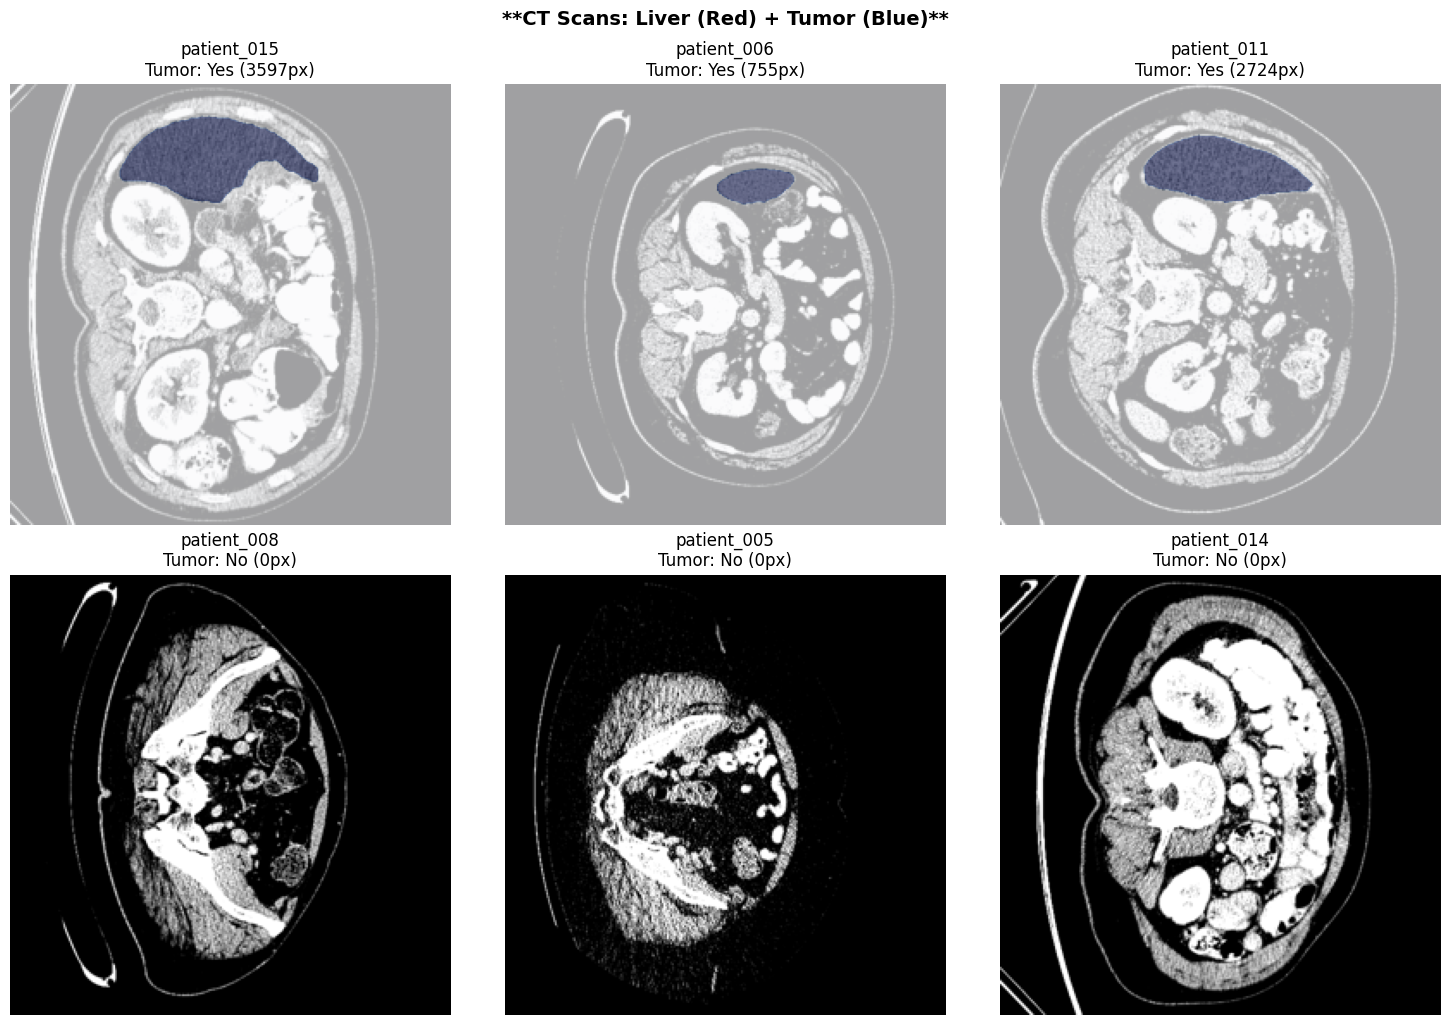


🎯 **STEP 4: CREATING DATASETS**
Train slices: 3130
Val slices: 783
🔍 Analyzing 3130 slices...
  **Tumor slices: 1383**
  **No tumor slices: 1747**
  **Actual tumor rate: 44.2%**
🔍 Analyzing 783 slices...
  **Tumor slices: 346**
  **No tumor slices: 437**
  **Actual tumor rate: 44.2%**
🎯 Creating balanced loader for 3130 samples...
  Weight distribution: {1.0: 1686, 3.0: 232, 4.0: 263, 5.0: 949}

🧠 **STEP 5: MODEL SETUP (FIXED)**
🏃 **STEP 6: TRAINING LOOP**
Expected progression:
  Epochs 1-5: Loss 0.3-0.6, Liver Dice 0.3-0.6, Tumor Dice 0.2-0.4
  Epochs 6-15: Loss 0.1-0.3, Liver Dice 0.6-0.8, Tumor Dice 0.4-0.6
  Epochs 16+: Loss 0.05-0.2, Liver Dice 0.8+, Tumor Dice 0.6+

**Epoch  1/40** | Loss: 1.1952/0.9919 | Liver: 0.8018 | **Tumor: 0.7083** | LR: 2.00e-04
  🎉 New best tumor dice: 0.7083
**Epoch  2/40** | Loss: 0.6161/0.6448 | Liver: 0.8289 | **Tumor: 0.7420** | LR: 1.95e-04
  🎉 New best tumor dice: 0.7420
**Epoch  3/40** | Loss: 0.4243/0.4882 | Liver: 0.8872 | **Tumor: 0.7829** | 

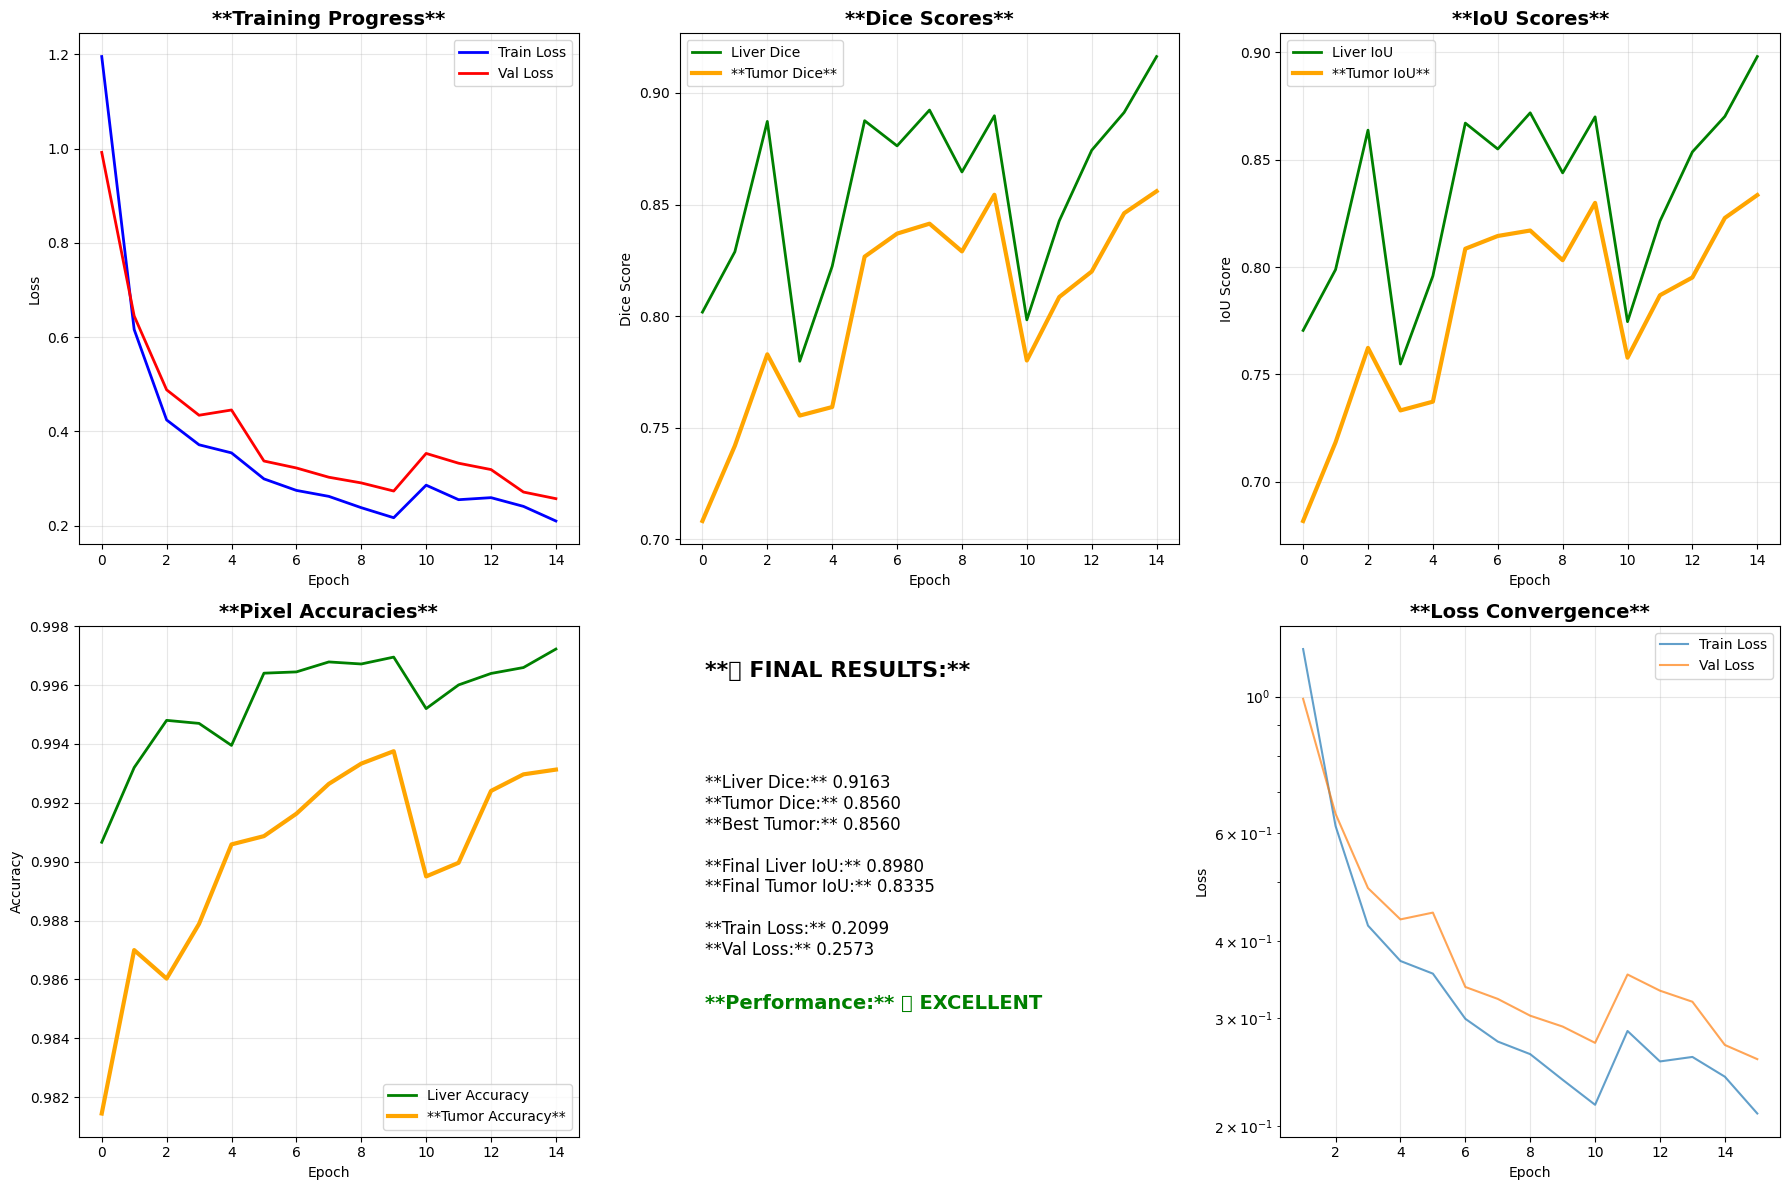


🖼️ **CREATING PREDICTIONS VISUALIZATION**
📂 Scanning /kaggle/input/main-final/ct_scans...
Found 21 patient directories
  patient_000: 75 slices
  patient_001: 122 slices
  patient_002: 189 slices
  patient_003: 193 slices
  patient_004: 206 slices
  patient_005: 191 slices
  patient_006: 193 slices
  patient_007: 193 slices
  patient_008: 201 slices
  patient_009: 204 slices
  patient_010: 188 slices
  patient_011: 193 slices
  patient_012: 199 slices
  patient_013: 196 slices
  patient_014: 191 slices
  patient_015: 191 slices
  patient_016: 192 slices
  patient_017: 200 slices
  patient_018: 199 slices
  patient_019: 197 slices
  patient_020: 200 slices
🔍 Analyzing 783 slices...
  **Tumor slices: 336**
  **No tumor slices: 447**
  **Actual tumor rate: 42.9%**


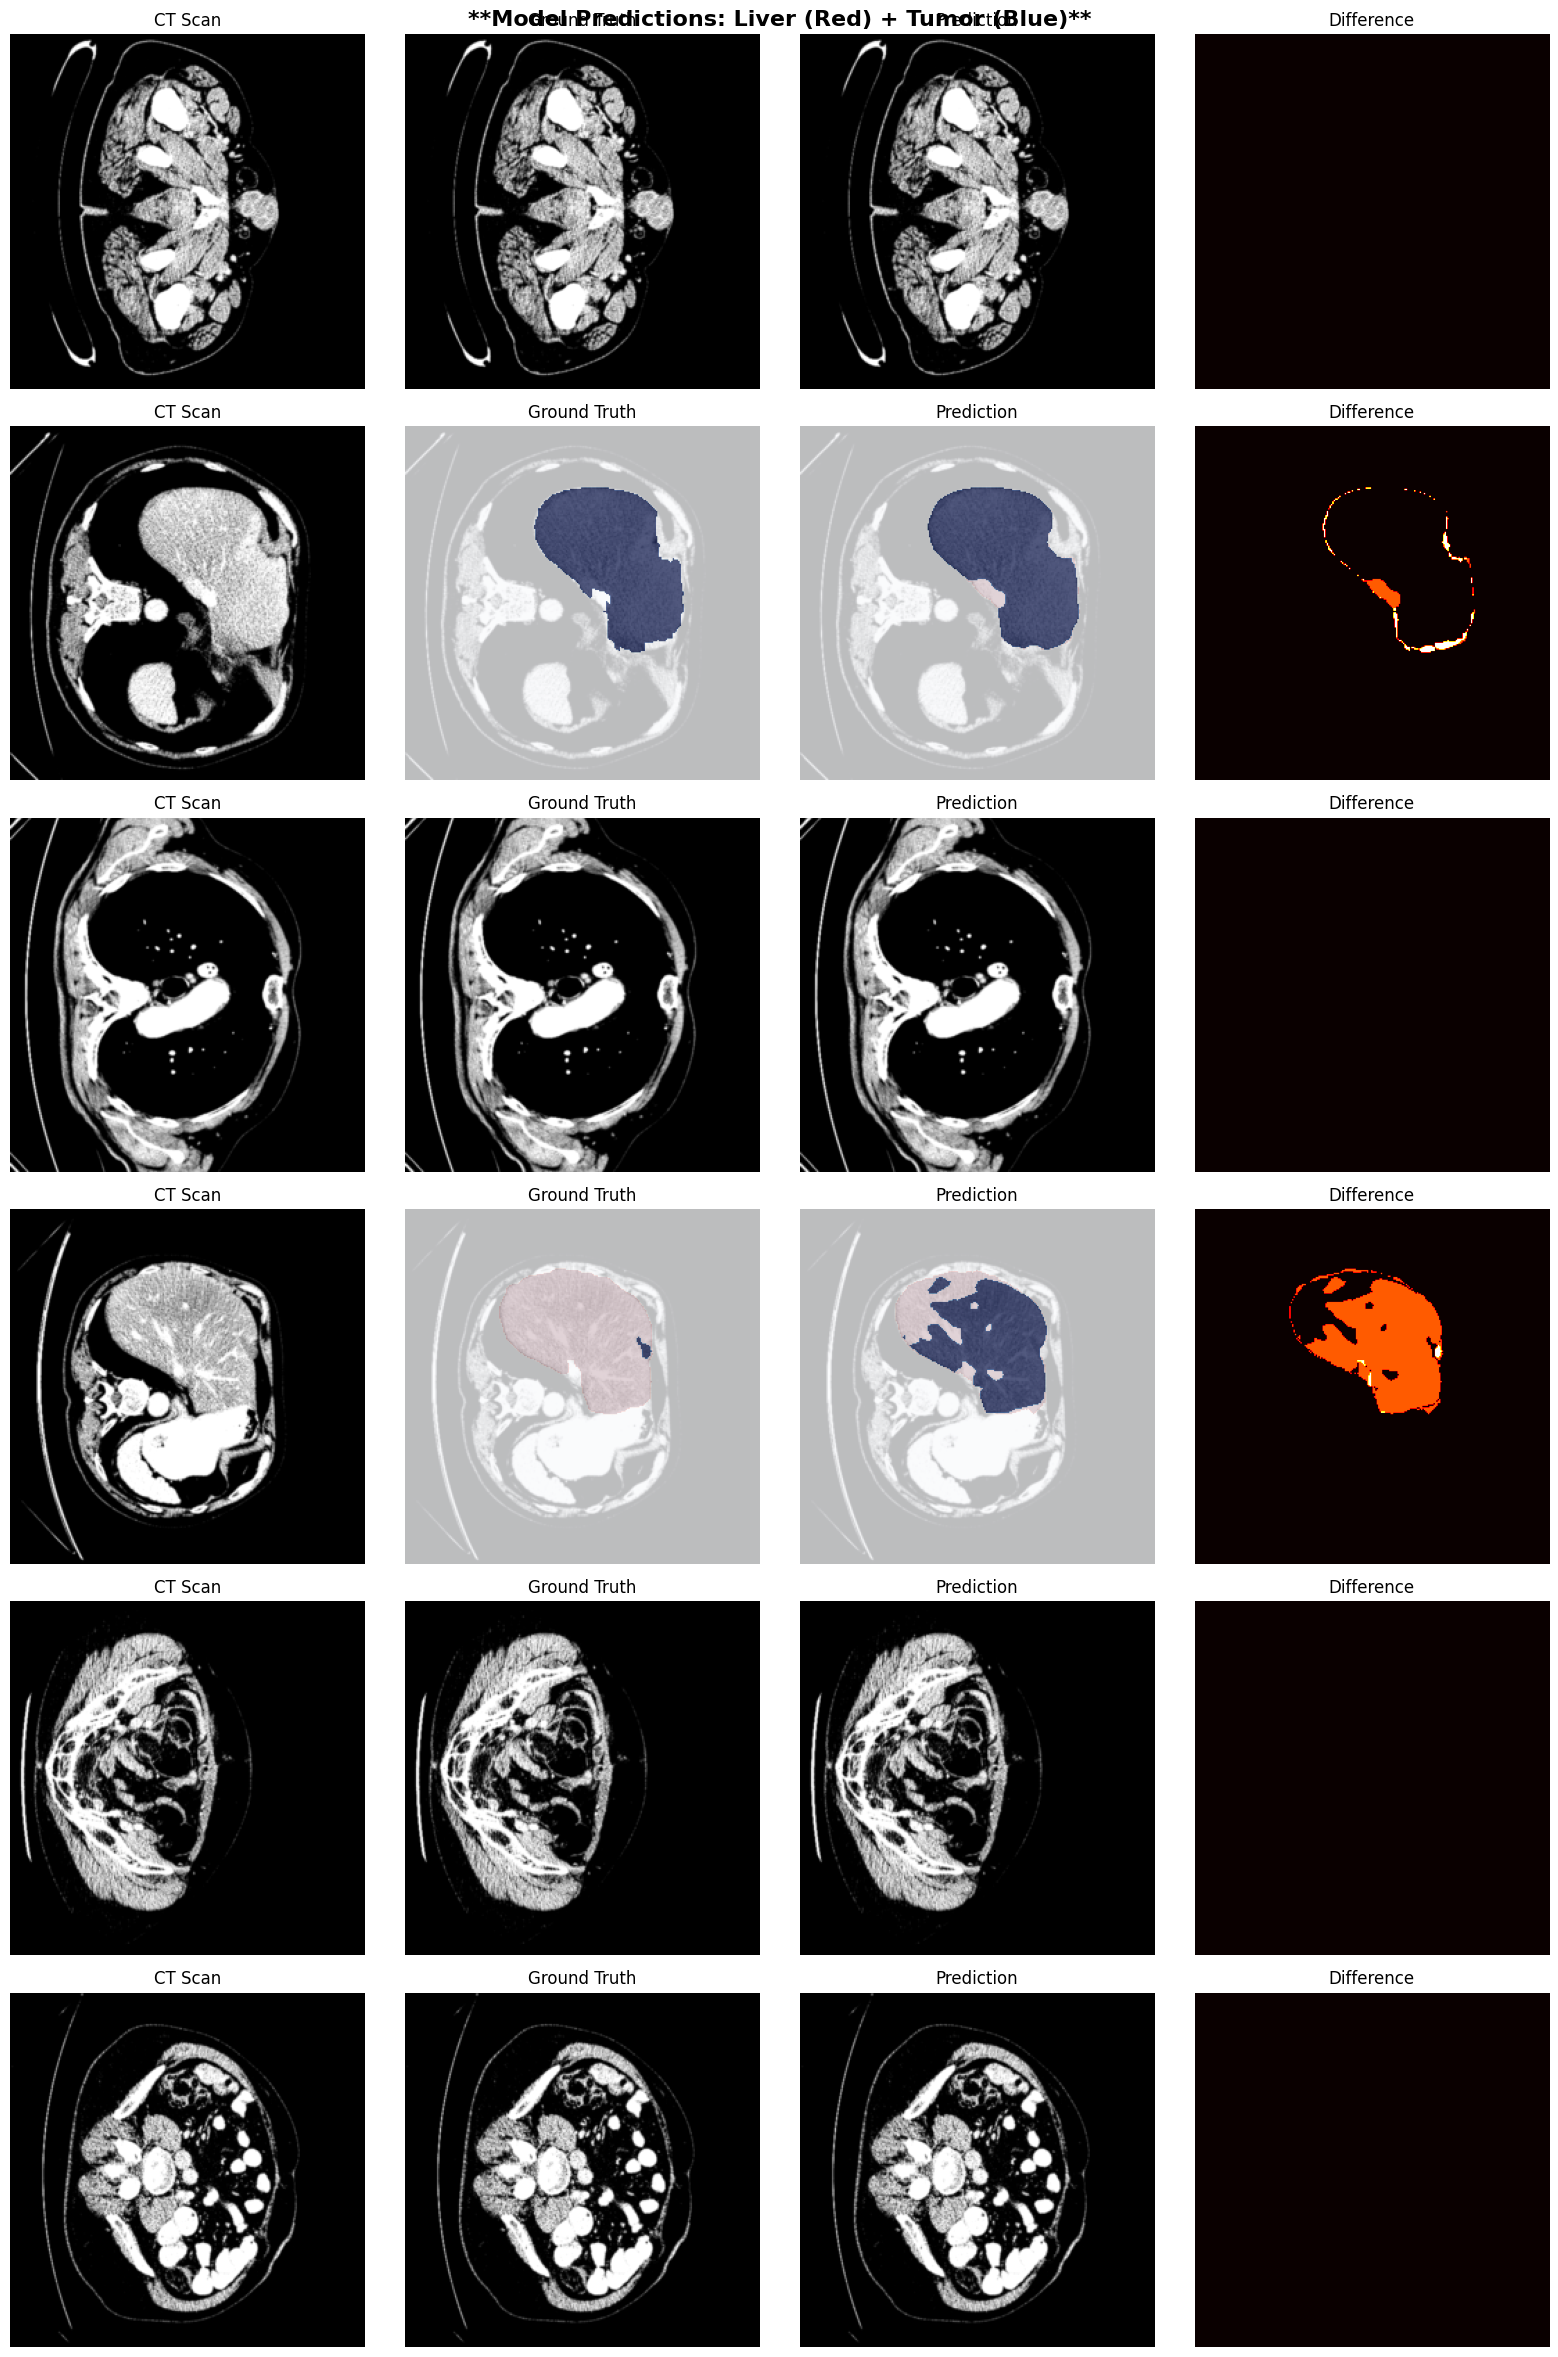


🎉 **TRAINING COMPLETED SUCCESSFULLY!**
🎯 Best tumor dice achieved: 0.8560
🎯 Final liver dice: 0.9163
💾 Model saved as 'final_fixed_model.pth'


In [6]:
# ============================================================
# 🧠 COMPLETE ENHANCED LIVER + TUMOR SEGMENTATION
# ============================================================

import os
import random
import math
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from collections import defaultdict
import warnings

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as T

warnings.filterwarnings('ignore')
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# ============================================================
# 📁 DATASET CONFIGURATION
# ============================================================
CT_ROOT = '/kaggle/input/main-final/ct_scans'
LIVER_ROOT = '/kaggle/input/main-final/liver_masks'
TUMOR_ROOT = '/kaggle/input/main-final/tumor_masks'

IMG_SIZE = (256, 256)
BATCH_SIZE = 8
EPOCHS = 40
LR = 2e-4
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
SEED = 42

# CT windowing parameters for better contrast
WINDOW_CENTER = 50
WINDOW_WIDTH = 350

print(f"🎯 **ENHANCED SEGMENTATION FOR YOUR DATASET**")
print(f"Device: {DEVICE}")
print("=" * 60)

# ============================================================
# 🔍 ENHANCED SLICE COLLECTION WITH PROPER TUMOR DETECTION
# ============================================================

def collect_slices_with_analysis(root_dir: str) -> list:
    """
    Collect all slices from patient subfolders and analyze structure
    Returns: [(patient, filename), ...]
    """
    exts = ('.png', '.jpg', '.jpeg')
    slices = []
    
    print(f"📂 Scanning {root_dir}...")
    
    if not os.path.exists(root_dir):
        print(f"❌ Directory not found: {root_dir}")
        return []
    
    patient_dirs = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    print(f"Found {len(patient_dirs)} patient directories")
    
    for patient in sorted(patient_dirs):
        patient_path = os.path.join(root_dir, patient)
        files = [f for f in os.listdir(patient_path) if f.lower().endswith(exts)]
        
        for fname in sorted(files):
            slices.append((patient, fname))
        
        if len(files) > 0:
            print(f"  {patient}: {len(files)} slices")
    
    return slices

def analyze_tumor_distribution(all_slices, tumor_root, sample_size=500):
    """
    Properly analyze tumor distribution with blank mask detection
    """
    print(f"\n🔍 **ANALYZING TUMOR DISTRIBUTION** (Sample: {sample_size})")
    
    tumor_stats = {
        'total_checked': 0,
        'has_tumor_file': 0,
        'has_significant_tumor': 0,
        'blank_tumor_masks': 0,
        'tumor_pixel_counts': []
    }
    
    # Sample slices for analysis
    sample_slices = random.sample(all_slices, min(sample_size, len(all_slices)))
    
    for patient, fname in sample_slices:
        tumor_stats['total_checked'] += 1
        tumor_path = os.path.join(tumor_root, patient, fname)
        
        if os.path.exists(tumor_path):
            tumor_stats['has_tumor_file'] += 1
            
            try:
                tumor_img = Image.open(tumor_path).convert('L')
                tumor_array = np.array(tumor_img)
                
                # Count non-zero pixels (actual tumor)
                tumor_pixels = np.sum(tumor_array > 10)  # Threshold for noise
                tumor_stats['tumor_pixel_counts'].append(tumor_pixels)
                
                if tumor_pixels > 100:  # Significant tumor threshold
                    tumor_stats['has_significant_tumor'] += 1
                else:
                    tumor_stats['blank_tumor_masks'] += 1
                    
            except Exception as e:
                print(f"  ⚠️ Error reading {tumor_path}: {e}")
                tumor_stats['blank_tumor_masks'] += 1
    
    # Calculate percentages
    file_rate = (tumor_stats['has_tumor_file'] / tumor_stats['total_checked']) * 100
    significant_rate = (tumor_stats['has_significant_tumor'] / tumor_stats['total_checked']) * 100
    blank_rate = (tumor_stats['blank_tumor_masks'] / tumor_stats['total_checked']) * 100
    
    print(f"📊 **TUMOR ANALYSIS RESULTS:**")
    print(f"  Total slices checked: {tumor_stats['total_checked']}")
    print(f"  Has tumor file: {tumor_stats['has_tumor_file']} ({file_rate:.1f}%)")
    print(f"  **Significant tumor: {tumor_stats['has_significant_tumor']} ({significant_rate:.1f}%)**")
    print(f"  **Blank/minimal tumor: {tumor_stats['blank_tumor_masks']} ({blank_rate:.1f}%)**")
    
    if tumor_stats['tumor_pixel_counts']:
        avg_pixels = np.mean([p for p in tumor_stats['tumor_pixel_counts'] if p > 0])
        print(f"  Average tumor size: {avg_pixels:.0f} pixels")
    
    return tumor_stats

def has_significant_tumor(patient, fname, tumor_root, threshold=100):
    """
    Check if slice has significant tumor (not blank)
    """
    tumor_path = os.path.join(tumor_root, patient, fname)
    
    if not os.path.exists(tumor_path):
        return False
    
    try:
        tumor_img = Image.open(tumor_path).convert('L')
        tumor_array = np.array(tumor_img)
        tumor_pixels = np.sum(tumor_array > 10)
        return tumor_pixels > threshold
    except:
        return False

def visualize_dataset_samples(all_slices, ct_root, liver_root, tumor_root, num_samples=6):
    """
    Visualize samples with proper tumor detection
    """
    print(f"\n🖼️ **VISUALIZING DATASET SAMPLES**")
    
    # Find balanced samples
    tumor_samples = []
    no_tumor_samples = []
    
    for patient, fname in random.sample(all_slices, min(200, len(all_slices))):
        if has_significant_tumor(patient, fname, tumor_root):
            tumor_samples.append((patient, fname))
        else:
            no_tumor_samples.append((patient, fname))
    
    print(f"Found {len(tumor_samples)} tumor samples, {len(no_tumor_samples)} no-tumor samples")
    
    # Select balanced samples
    tumor_count = min(num_samples//2, len(tumor_samples))
    no_tumor_count = min(num_samples - tumor_count, len(no_tumor_samples))
    
    selected_samples = (tumor_samples[:tumor_count] + 
                       no_tumor_samples[:no_tumor_count])
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (patient, fname) in enumerate(selected_samples):
        if i >= 6:
            break
            
        # Load images
        ct_path = os.path.join(ct_root, patient, fname)
        liver_path = os.path.join(liver_root, patient, fname)
        tumor_path = os.path.join(tumor_root, patient, fname)
        
        try:
            ct_img = np.array(Image.open(ct_path).convert('L').resize(IMG_SIZE))
            liver_img = np.array(Image.open(liver_path).convert('L').resize(IMG_SIZE))
            
            # Enhanced tumor loading
            if os.path.exists(tumor_path):
                tumor_img = np.array(Image.open(tumor_path).convert('L').resize(IMG_SIZE))
                tumor_pixels = np.sum(tumor_img > 10)
            else:
                tumor_img = np.zeros_like(ct_img)
                tumor_pixels = 0
            
            # Normalize CT
            ct_img = (ct_img - ct_img.min()) / (ct_img.max() - ct_img.min() + 1e-8)
            
            # Plot
            axes[i].imshow(ct_img, cmap='gray')
            if np.sum(liver_img > 10) > 0:
                axes[i].imshow(liver_img, cmap='Reds', alpha=0.3)
            if tumor_pixels > 100:
                axes[i].imshow(tumor_img, cmap='Blues', alpha=0.5)
            
            axes[i].set_title(f'{patient}\nTumor: {"Yes" if tumor_pixels > 100 else "No"} ({tumor_pixels}px)')
            axes[i].axis('off')
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading\n{patient}', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('**CT Scans: Liver (Red) + Tumor (Blue)**', y=1.02, fontsize=14, weight='bold')
    plt.show()

# ============================================================
# 📚 ENHANCED DATASET CLASS FOR YOUR STRUCTURE
# ============================================================

class EnhancedLiverTumorDataset(Dataset):
    def __init__(self, slice_index, ct_root, liver_root, tumor_root, augment=False):
        self.slices = slice_index
        self.ct_root = ct_root
        self.liver_root = liver_root
        self.tumor_root = tumor_root
        self.augment = augment
        
        # Enhanced transforms
        self.base_transform = T.Compose([
            T.Resize(IMG_SIZE, antialias=True),
            T.ToTensor()
        ])
        
        self.aug_transform = T.Compose([
            T.Resize(IMG_SIZE, antialias=True),
            T.RandomHorizontalFlip(p=0.5),
            T.RandomVerticalFlip(p=0.3),
            T.RandomRotation(degrees=10, fill=0),
            T.ColorJitter(brightness=0.15, contrast=0.15),
            T.ToTensor()
        ])
        
        # Analyze tumor distribution
        self.tumor_slices = []
        self.no_tumor_slices = []
        
        print(f"🔍 Analyzing {len(slice_index)} slices...")
        
        for patient, fname in slice_index:
            if has_significant_tumor(patient, fname, tumor_root):
                self.tumor_slices.append((patient, fname))
            else:
                self.no_tumor_slices.append((patient, fname))
        
        print(f"  **Tumor slices: {len(self.tumor_slices)}**")
        print(f"  **No tumor slices: {len(self.no_tumor_slices)}**")
        print(f"  **Actual tumor rate: {len(self.tumor_slices)/len(slice_index)*100:.1f}%**")
    
    def __len__(self):
        return len(self.slices)
    
    def load_image_safe(self, path, default_size=IMG_SIZE):
        """Safely load image with error handling"""
        try:
            if os.path.exists(path):
                img = Image.open(path).convert('L')
                return img
            else:
                return Image.fromarray(np.zeros(default_size, dtype=np.uint8))
        except Exception as e:
            print(f"  ⚠️ Error loading {path}: {e}")
            return Image.fromarray(np.zeros(default_size, dtype=np.uint8))
    
    def apply_ct_windowing(self, ct_array):
        """Apply CT windowing for better contrast"""
        ct_array = ct_array.astype(np.float32)
        
        # Basic normalization
        ct_min, ct_max = ct_array.min(), ct_array.max()
        if ct_max > ct_min:
            ct_array = (ct_array - ct_min) / (ct_max - ct_min)
        
        # Apply windowing
        ct_array = ct_array * 255
        lower = WINDOW_CENTER - WINDOW_WIDTH // 2
        upper = WINDOW_CENTER + WINDOW_WIDTH // 2
        ct_array = np.clip(ct_array, lower, upper)
        ct_array = (ct_array - lower) / (upper - lower)
        
        return ct_array
    
    def __getitem__(self, idx):
        patient, fname = self.slices[idx]
        
        # Load images
        ct_path = os.path.join(self.ct_root, patient, fname)
        liver_path = os.path.join(self.liver_root, patient, fname)
        tumor_path = os.path.join(self.tumor_root, patient, fname)
        
        ct_img = self.load_image_safe(ct_path)
        liver_img = self.load_image_safe(liver_path)
        tumor_img = self.load_image_safe(tumor_path)
        
        # Apply CT windowing
        ct_array = np.array(ct_img)
        ct_array = self.apply_ct_windowing(ct_array)
        ct_img = Image.fromarray((ct_array * 255).astype(np.uint8))
        
        # Check for significant tumor
        tumor_array = np.array(tumor_img)
        has_tumor = np.sum(tumor_array > 10) > 100
        
        # Apply transforms (synchronized for augmentation)
        if self.augment and has_tumor:
            # Use same seed for synchronized augmentation
            seed = random.randint(0, 2**32)
            
            random.seed(seed)
            torch.manual_seed(seed)
            ct_tensor = self.aug_transform(ct_img)
            
            random.seed(seed)
            torch.manual_seed(seed)
            liver_tensor = self.aug_transform(liver_img)
            
            random.seed(seed)
            torch.manual_seed(seed)
            tumor_tensor = self.aug_transform(tumor_img)
        else:
            ct_tensor = self.base_transform(ct_img)
            liver_tensor = self.base_transform(liver_img)
            tumor_tensor = self.base_transform(tumor_img)
        
        # Normalize CT
        ct_tensor = (ct_tensor - ct_tensor.mean()) / (ct_tensor.std() + 1e-8)
        
        # Create binary masks with proper thresholding
        liver_mask = (liver_tensor > 0.3).float()
        tumor_mask = (tumor_tensor > 0.3).float()
        
        # Ensure tumor mask is truly binary for small tumors
        if torch.sum(tumor_mask) < 10:
            tumor_mask = torch.zeros_like(tumor_mask)
        
        combined_mask = torch.cat([liver_mask, tumor_mask], dim=0)
        
        return ct_tensor, combined_mask

# ============================================================
# 🎯 ENHANCED LOSS FUNCTIONS
# ============================================================

class AdaptiveDiceLoss(nn.Module):
    def __init__(self, smooth=1e-7):
        super().__init__()
        self.smooth = smooth
    
    def forward(self, pred, target):
        pred_flat = pred.reshape(-1)
        target_flat = target.reshape(-1)
        
        intersection = (pred_flat * target_flat).sum()
        union = pred_flat.sum() + target_flat.sum()
        
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, pred, target):
        bce_loss = F.binary_cross_entropy(pred, target, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

class EnhancedCombinedLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.dice_loss = AdaptiveDiceLoss()
        self.focal_loss = FocalLoss()
        self.bce_loss = nn.BCELoss()
    
    def forward(self, pred, target):
        # Separate channels
        liver_pred, tumor_pred = pred[:, 0], pred[:, 1]
        liver_target, tumor_target = target[:, 0], target[:, 1]
        
        # Calculate losses
        liver_dice = self.dice_loss(liver_pred, liver_target)
        tumor_dice = self.dice_loss(tumor_pred, tumor_target)
        
        liver_focal = self.focal_loss(liver_pred, liver_target)
        tumor_focal = self.focal_loss(tumor_pred, tumor_target)
        
        liver_bce = self.bce_loss(liver_pred, liver_target)
        tumor_bce = self.bce_loss(tumor_pred, tumor_target)
        
        # Weighted combination (higher weight for tumor)
        liver_total = 0.4 * liver_dice + 0.3 * liver_focal + 0.3 * liver_bce
        tumor_total = 0.4 * tumor_dice + 0.4 * tumor_focal + 0.2 * tumor_bce
        
        return liver_total + 2.5 * tumor_total

# ============================================================
# 🧠 FIXED ATTENTION U-NET MODEL
# ============================================================

class AttentionGate(nn.Module):
    def __init__(self, in_channels, gating_channels, inter_channels):
        super().__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(gating_channels, inter_channels, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(inter_channels)
        )
        
        self.W_x = nn.Sequential(
            nn.Conv2d(in_channels, inter_channels, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(inter_channels)
        )
        
        self.psi = nn.Sequential(
            nn.Conv2d(inter_channels, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )
        
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x, g):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        return x * psi

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.1):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.conv(x)

class FixedAttentionUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=2):
        super().__init__()
        
        # Encoder
        self.enc1 = ConvBlock(in_channels, 64)
        self.enc2 = ConvBlock(64, 128)
        self.enc3 = ConvBlock(128, 256)
        self.enc4 = ConvBlock(256, 512)
        
        # Bottleneck
        self.bottleneck = ConvBlock(512, 1024, dropout=0.2)
        
        # ✅ FIXED: Correct channel dimensions for attention gates
        self.att4 = AttentionGate(512, 512, 256)   # gating_channels=512 (not 1024)
        self.att3 = AttentionGate(256, 256, 128)   # gating_channels=256 (not 512)
        self.att2 = AttentionGate(128, 128, 64)    # gating_channels=128 (not 256)
        self.att1 = AttentionGate(64, 64, 32)      # gating_channels=64 (not 128)
        
        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = ConvBlock(1024, 512)
        
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = ConvBlock(512, 256)
        
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = ConvBlock(256, 128)
        
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = ConvBlock(128, 64)
        
        # Output
        self.out = nn.Conv2d(64, out_channels, 1)
        
        # Pooling
        self.pool = nn.MaxPool2d(2)
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)                    # [B, 64, H, W]
        enc2 = self.enc2(self.pool(enc1))      # [B, 128, H/2, W/2]
        enc3 = self.enc3(self.pool(enc2))      # [B, 256, H/4, W/4]
        enc4 = self.enc4(self.pool(enc3))      # [B, 512, H/8, W/8]
        
        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc4))  # [B, 1024, H/16, W/16]
        
        # ✅ FIXED: Decoder with corrected attention
        dec4 = self.up4(bottleneck)            # [B, 512, H/8, W/8]
        enc4_att = self.att4(enc4, dec4)       # Now both are 512 channels ✅
        dec4 = self.dec4(torch.cat([dec4, enc4_att], dim=1))  # [B, 512, H/8, W/8]
        
        dec3 = self.up3(dec4)                  # [B, 256, H/4, W/4]
        enc3_att = self.att3(enc3, dec3)       # Now both are 256 channels ✅
        dec3 = self.dec3(torch.cat([dec3, enc3_att], dim=1))  # [B, 256, H/4, W/4]
        
        dec2 = self.up2(dec3)                  # [B, 128, H/2, W/2]
        enc2_att = self.att2(enc2, dec2)       # Now both are 128 channels ✅
        dec2 = self.dec2(torch.cat([dec2, enc2_att], dim=1))  # [B, 128, H/2, W/2]
        
        dec1 = self.up1(dec2)                  # [B, 64, H, W]
        enc1_att = self.att1(enc1, dec1)       # Now both are 64 channels ✅
        dec1 = self.dec1(torch.cat([dec1, enc1_att], dim=1))  # [B, 64, H, W]
        
        return torch.sigmoid(self.out(dec1))

# ============================================================
# ⚖️ ENHANCED BALANCED SAMPLING
# ============================================================

def create_enhanced_balanced_loader(dataset, batch_size=8):
    """Create balanced loader with proper tumor weighting"""
    sample_weights = []
    
    print(f"🎯 Creating balanced loader for {len(dataset)} samples...")
    
    for i in range(len(dataset)):
        try:
            _, mask = dataset[i]
            tumor_pixels = torch.sum(mask[1])  # Tumor channel
            
            # Adaptive weighting based on tumor size
            if tumor_pixels > 500:
                weight = 5.0  # Large tumor
            elif tumor_pixels > 100:
                weight = 4.0  # Medium tumor
            elif tumor_pixels > 10:
                weight = 3.0  # Small tumor
            else:
                weight = 1.0  # No tumor
                
            sample_weights.append(weight)
            
        except Exception as e:
            print(f"  ⚠️ Error processing sample {i}: {e}")
            sample_weights.append(1.0)
    
    # Calculate weight distribution
    weight_counts = {1.0: 0, 3.0: 0, 4.0: 0, 5.0: 0}
    for w in sample_weights:
        if w in weight_counts:
            weight_counts[w] += 1
    
    print(f"  Weight distribution: {weight_counts}")
    
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        replacement=True
    )
    
    return DataLoader(
        dataset, 
        batch_size=batch_size, 
        sampler=sampler,
        num_workers=2,
        pin_memory=True,
        persistent_workers=True
    )

# ============================================================
# 📊 ADVANCED METRICS
# ============================================================

def calculate_comprehensive_metrics(pred, target, thresholds=[0.2, 0.3, 0.4, 0.5]):
    """Calculate metrics across multiple thresholds"""
    results = {}
    
    for threshold in thresholds:
        pred_binary = (pred > threshold).float()
        
        # Per-channel metrics
        channel_results = []
        for i in range(pred.shape[1]):
            pred_ch = pred_binary[:, i]
            target_ch = target[:, i]
            
            # Dice score
            intersection = (pred_ch * target_ch).sum(dim=(1, 2))
            union = pred_ch.sum(dim=(1, 2)) + target_ch.sum(dim=(1, 2))
            dice = torch.where(union > 0, (2 * intersection) / (union + 1e-8), torch.ones_like(union))
            
            # IoU
            iou = torch.where(union > intersection, intersection / (union - intersection + 1e-8), torch.ones_like(union))
            
            # Accuracy
            correct = (pred_ch == target_ch).float()
            accuracy = correct.mean(dim=(1, 2))
            
            channel_results.append({
                'dice': dice.mean().item(),
                'iou': iou.mean().item(),
                'accuracy': accuracy.mean().item()
            })
        
        results[threshold] = {
            'liver': channel_results[0],
            'tumor': channel_results[1]
        }
    
    return results

# ============================================================
# 🚀 COMPLETE TRAINING FUNCTION
# ============================================================

def train_enhanced_model_fixed():
    """Training function with the fixed model"""
    
    print("🚀 **STARTING ENHANCED TRAINING WITH FIXED MODEL**")
    print("=" * 60)
    
    # Step 1: Collect and analyze data
    print("\n📂 **STEP 1: DATA COLLECTION**")
    all_slices = collect_slices_with_analysis(CT_ROOT)
    
    if len(all_slices) == 0:
        print("❌ No slices found! Check your dataset paths.")
        return None, None
    
    print(f"✅ Total slices collected: {len(all_slices):,}")
    
    # Step 2: Analyze tumor distribution
    print("\n📊 **STEP 2: TUMOR ANALYSIS**")
    tumor_stats = analyze_tumor_distribution(all_slices, TUMOR_ROOT)
    
    # Step 3: Visualize samples
    print("\n🖼️ **STEP 3: DATASET VISUALIZATION**")
    visualize_dataset_samples(all_slices, CT_ROOT, LIVER_ROOT, TUMOR_ROOT)
    
    # Step 4: Create datasets
    print("\n🎯 **STEP 4: CREATING DATASETS**")
    train_slices, val_slices = train_test_split(
        all_slices, test_size=0.2, random_state=SEED,
        stratify=[has_significant_tumor(p, f, TUMOR_ROOT) for p, f in all_slices]
    )
    
    print(f"Train slices: {len(train_slices)}")
    print(f"Val slices: {len(val_slices)}")
    
    # Create datasets
    train_dataset = EnhancedLiverTumorDataset(train_slices, CT_ROOT, LIVER_ROOT, TUMOR_ROOT, augment=True)
    val_dataset = EnhancedLiverTumorDataset(val_slices, CT_ROOT, LIVER_ROOT, TUMOR_ROOT, augment=False)
    
    # Create data loaders
    train_loader = create_enhanced_balanced_loader(train_dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    # Step 5: Model setup with FIXED model
    print(f"\n🧠 **STEP 5: MODEL SETUP (FIXED)**")
    model = FixedAttentionUNet(in_channels=1, out_channels=2).to(DEVICE)
    criterion = EnhancedCombinedLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    
    # Enhanced scheduler
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=10, T_mult=2, eta_min=1e-6
    )
    
    # Training history
    history = {
        'train_loss': [], 'val_loss': [],
        'liver_dice': [], 'tumor_dice': [],
        'liver_iou': [], 'tumor_iou': [],
        'liver_acc': [], 'tumor_acc': []
    }
    
    best_tumor_dice = 0.0
    patience_counter = 0
    patience = 8
    
    print(f"🏃 **STEP 6: TRAINING LOOP**")
    print("Expected progression:")
    print("  Epochs 1-5: Loss 0.3-0.6, Liver Dice 0.3-0.6, Tumor Dice 0.2-0.4")
    print("  Epochs 6-15: Loss 0.1-0.3, Liver Dice 0.6-0.8, Tumor Dice 0.4-0.6")
    print("  Epochs 16+: Loss 0.05-0.2, Liver Dice 0.8+, Tumor Dice 0.6+")
    print()
    
    for epoch in range(EPOCHS):
        # Training phase
        model.train()
        train_loss = 0.0
        train_batches = 0
        
        for batch_idx, (x, y) in enumerate(train_loader):
            x, y = x.to(DEVICE), y.to(DEVICE)
            
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            
            if torch.isnan(loss) or torch.isinf(loss):
                print(f"⚠️ Invalid loss at epoch {epoch+1}, batch {batch_idx}")
                continue
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_batches += 1
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_batches = 0
        all_metrics = []
        
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(DEVICE), y.to(DEVICE)
                pred = model(x)
                loss = criterion(pred, y)
                
                val_loss += loss.item()
                val_batches += 1
                
                # Calculate metrics
                metrics = calculate_comprehensive_metrics(pred.cpu(), y.cpu())
                all_metrics.append(metrics)
        
        # Average metrics
        if train_batches > 0 and val_batches > 0 and all_metrics:
            avg_train_loss = train_loss / train_batches
            avg_val_loss = val_loss / val_batches
            
            # Use threshold 0.3 for main metrics
            liver_dice = np.mean([m[0.3]['liver']['dice'] for m in all_metrics])
            tumor_dice = np.mean([m[0.3]['tumor']['dice'] for m in all_metrics])
            liver_iou = np.mean([m[0.3]['liver']['iou'] for m in all_metrics])
            tumor_iou = np.mean([m[0.3]['tumor']['iou'] for m in all_metrics])
            liver_acc = np.mean([m[0.3]['liver']['accuracy'] for m in all_metrics])
            tumor_acc = np.mean([m[0.3]['tumor']['accuracy'] for m in all_metrics])
            
            # Update history
            history['train_loss'].append(avg_train_loss)
            history['val_loss'].append(avg_val_loss)
            history['liver_dice'].append(liver_dice)
            history['tumor_dice'].append(tumor_dice)
            history['liver_iou'].append(liver_iou)
            history['tumor_iou'].append(tumor_iou)
            history['liver_acc'].append(liver_acc)
            history['tumor_acc'].append(tumor_acc)
            
            # Print progress
            print(f"**Epoch {epoch+1:2d}/{EPOCHS}** | "
                  f"Loss: {avg_train_loss:.4f}/{avg_val_loss:.4f} | "
                  f"Liver: {liver_dice:.4f} | "
                  f"**Tumor: {tumor_dice:.4f}** | "
                  f"LR: {optimizer.param_groups[0]['lr']:.2e}")
            
            # Save best model
            if tumor_dice > best_tumor_dice:
                best_tumor_dice = tumor_dice
                torch.save(model.state_dict(), 'best_fixed_tumor_model.pth')
                print(f"  🎉 New best tumor dice: {tumor_dice:.4f}")
                patience_counter = 0
            else:
                patience_counter += 1
            
            # Early stopping
            if patience_counter >= patience:
                print(f"⏰ Early stopping at epoch {epoch+1}")
                break
            
            # Achievement milestones
            if tumor_dice > 0.85 and liver_dice > 0.9:
                print(f"🏆 **EXCELLENT PERFORMANCE ACHIEVED!**")
                print(f"   Liver Dice: {liver_dice:.4f} | Tumor Dice: {tumor_dice:.4f}")
                break
            
            scheduler.step()
    
    print(f"\n✅ **TRAINING COMPLETED!**")
    print(f"🎯 Best tumor dice: {best_tumor_dice:.4f}")
    print(f"🎯 Final liver dice: {history['liver_dice'][-1]:.4f}")
    
    return model, history

# ============================================================
# 📊 VISUALIZATION FUNCTIONS
# ============================================================

def plot_comprehensive_results(history):
    """Plot detailed training results"""
    
    if not history or len(history['train_loss']) == 0:
        print("❌ No training history to plot")
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Loss curves
    axes[0,0].plot(history['train_loss'], label='Train Loss', linewidth=2, color='blue')
    axes[0,0].plot(history['val_loss'], label='Val Loss', linewidth=2, color='red')
    axes[0,0].set_title('**Training Progress**', fontsize=14, weight='bold')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Dice scores
    axes[0,1].plot(history['liver_dice'], label='Liver Dice', linewidth=2, color='green')
    axes[0,1].plot(history['tumor_dice'], label='**Tumor Dice**', linewidth=3, color='orange')
    axes[0,1].set_title('**Dice Scores**', fontsize=14, weight='bold')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Dice Score')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # IoU scores
    axes[0,2].plot(history['liver_iou'], label='Liver IoU', linewidth=2, color='green')
    axes[0,2].plot(history['tumor_iou'], label='**Tumor IoU**', linewidth=3, color='orange')
    axes[0,2].set_title('**IoU Scores**', fontsize=14, weight='bold')
    axes[0,2].set_xlabel('Epoch')
    axes[0,2].set_ylabel('IoU Score')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # Accuracies
    axes[1,0].plot(history['liver_acc'], label='Liver Accuracy', linewidth=2, color='green')
    axes[1,0].plot(history['tumor_acc'], label='**Tumor Accuracy**', linewidth=3, color='orange')
    axes[1,0].set_title('**Pixel Accuracies**', fontsize=14, weight='bold')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Performance summary
    final_liver_dice = history['liver_dice'][-1]
    final_tumor_dice = history['tumor_dice'][-1]
    best_tumor_dice = max(history['tumor_dice'])
    
    axes[1,1].text(0.05, 0.9, "**🎯 FINAL RESULTS:**", fontsize=16, weight='bold', 
                   transform=axes[1,1].transAxes)
    
    results_text = f"""
**Liver Dice:** {final_liver_dice:.4f}
**Tumor Dice:** {final_tumor_dice:.4f}
**Best Tumor:** {best_tumor_dice:.4f}

**Final Liver IoU:** {history['liver_iou'][-1]:.4f}
**Final Tumor IoU:** {history['tumor_iou'][-1]:.4f}

**Train Loss:** {history['train_loss'][-1]:.4f}
**Val Loss:** {history['val_loss'][-1]:.4f}
    """
    
    axes[1,1].text(0.05, 0.75, results_text, fontsize=12, transform=axes[1,1].transAxes,
                   verticalalignment='top')
    
    # Performance assessment
    if final_tumor_dice > 0.8:
        performance = "🌟 EXCELLENT"
        color = 'green'
    elif final_tumor_dice > 0.6:
        performance = "✅ VERY GOOD"
        color = 'blue'
    elif final_tumor_dice > 0.4:
        performance = "⚠️ GOOD"
        color = 'orange'
    else:
        performance = "❌ NEEDS IMPROVEMENT"
        color = 'red'
    
    axes[1,1].text(0.05, 0.25, f"**Performance:** {performance}", fontsize=14, weight='bold',
                   color=color, transform=axes[1,1].transAxes)
    
    axes[1,1].axis('off')
    
    # Training progression
    epochs = range(1, len(history['train_loss']) + 1)
    axes[1,2].plot(epochs, history['train_loss'], label='Train Loss', alpha=0.7)
    axes[1,2].plot(epochs, history['val_loss'], label='Val Loss', alpha=0.7)
    axes[1,2].set_title('**Loss Convergence**', fontsize=14, weight='bold')
    axes[1,2].set_xlabel('Epoch')
    axes[1,2].set_ylabel('Loss')
    axes[1,2].legend()
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].set_yscale('log')
    
    plt.tight_layout()
    plt.show()

def visualize_model_predictions(model, val_loader, device, num_samples=6):
    """Visualize model predictions vs ground truth"""
    
    model.eval()
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, num_samples * 4))
    
    sample_count = 0
    
    with torch.no_grad():
        for batch_idx, (x, y) in enumerate(val_loader):
            if sample_count >= num_samples:
                break
            
            x, y = x.to(device), y.to(device)
            pred = model(x)
            
            # Process first image in batch
            img = x[0, 0].cpu().numpy()
            liver_true = y[0, 0].cpu().numpy()
            tumor_true = y[0, 1].cpu().numpy()
            liver_pred = (pred[0, 0].cpu().numpy() > 0.3).astype(float)
            tumor_pred = (pred[0, 1].cpu().numpy() > 0.3).astype(float)
            
            # Original image
            axes[sample_count, 0].imshow(img, cmap='gray')
            axes[sample_count, 0].set_title('CT Scan')
            axes[sample_count, 0].axis('off')
            
            # Ground truth
            axes[sample_count, 1].imshow(img, cmap='gray')
            if np.sum(liver_true) > 0:
                axes[sample_count, 1].imshow(liver_true, cmap='Reds', alpha=0.4)
            if np.sum(tumor_true) > 0:
                axes[sample_count, 1].imshow(tumor_true, cmap='Blues', alpha=0.6)
            axes[sample_count, 1].set_title('Ground Truth')
            axes[sample_count, 1].axis('off')
            
            # Prediction
            axes[sample_count, 2].imshow(img, cmap='gray')
            if np.sum(liver_pred) > 0:
                axes[sample_count, 2].imshow(liver_pred, cmap='Reds', alpha=0.4)
            if np.sum(tumor_pred) > 0:
                axes[sample_count, 2].imshow(tumor_pred, cmap='Blues', alpha=0.6)
            axes[sample_count, 2].set_title('Prediction')
            axes[sample_count, 2].axis('off')
            
            # Difference map
            liver_diff = np.abs(liver_true - liver_pred)
            tumor_diff = np.abs(tumor_true - tumor_pred)
            total_diff = liver_diff + tumor_diff
            axes[sample_count, 3].imshow(total_diff, cmap='hot')
            axes[sample_count, 3].set_title('Difference')
            axes[sample_count, 3].axis('off')
            
            sample_count += 1
    
    plt.suptitle('**Model Predictions: Liver (Red) + Tumor (Blue)**', 
                 fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================
# 🎯 MAIN EXECUTION
# ============================================================

if __name__ == "__main__":
    print("🚀 **FIXED LIVER TUMOR SEGMENTATION - YOUR DATASET**")
    print("=" * 70)
    
    # Run complete enhanced training with FIXED model
    model, history = train_enhanced_model_fixed()
    
    if model is not None and history is not None:
        # Plot comprehensive results
        plot_comprehensive_results(history)
        
        # Create validation loader for visualization
        print("\n🖼️ **CREATING PREDICTIONS VISUALIZATION**")
        all_slices = collect_slices_with_analysis(CT_ROOT)
        _, val_slices = train_test_split(all_slices, test_size=0.2, random_state=SEED)
        
        val_dataset = EnhancedLiverTumorDataset(val_slices, CT_ROOT, LIVER_ROOT, TUMOR_ROOT, augment=False)
        val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
        
        visualize_model_predictions(model, val_loader, DEVICE)
        
        print("\n🎉 **TRAINING COMPLETED SUCCESSFULLY!**")
        print(f"🎯 Best tumor dice achieved: {max(history['tumor_dice']):.4f}")
        print(f"🎯 Final liver dice: {history['liver_dice'][-1]:.4f}")
        
        # Save final model
        torch.save(model.state_dict(), 'final_fixed_model.pth')
        print("💾 Model saved as 'final_fixed_model.pth'")
        
    else:
        print("❌ Training failed. Please check your dataset paths and try again.")


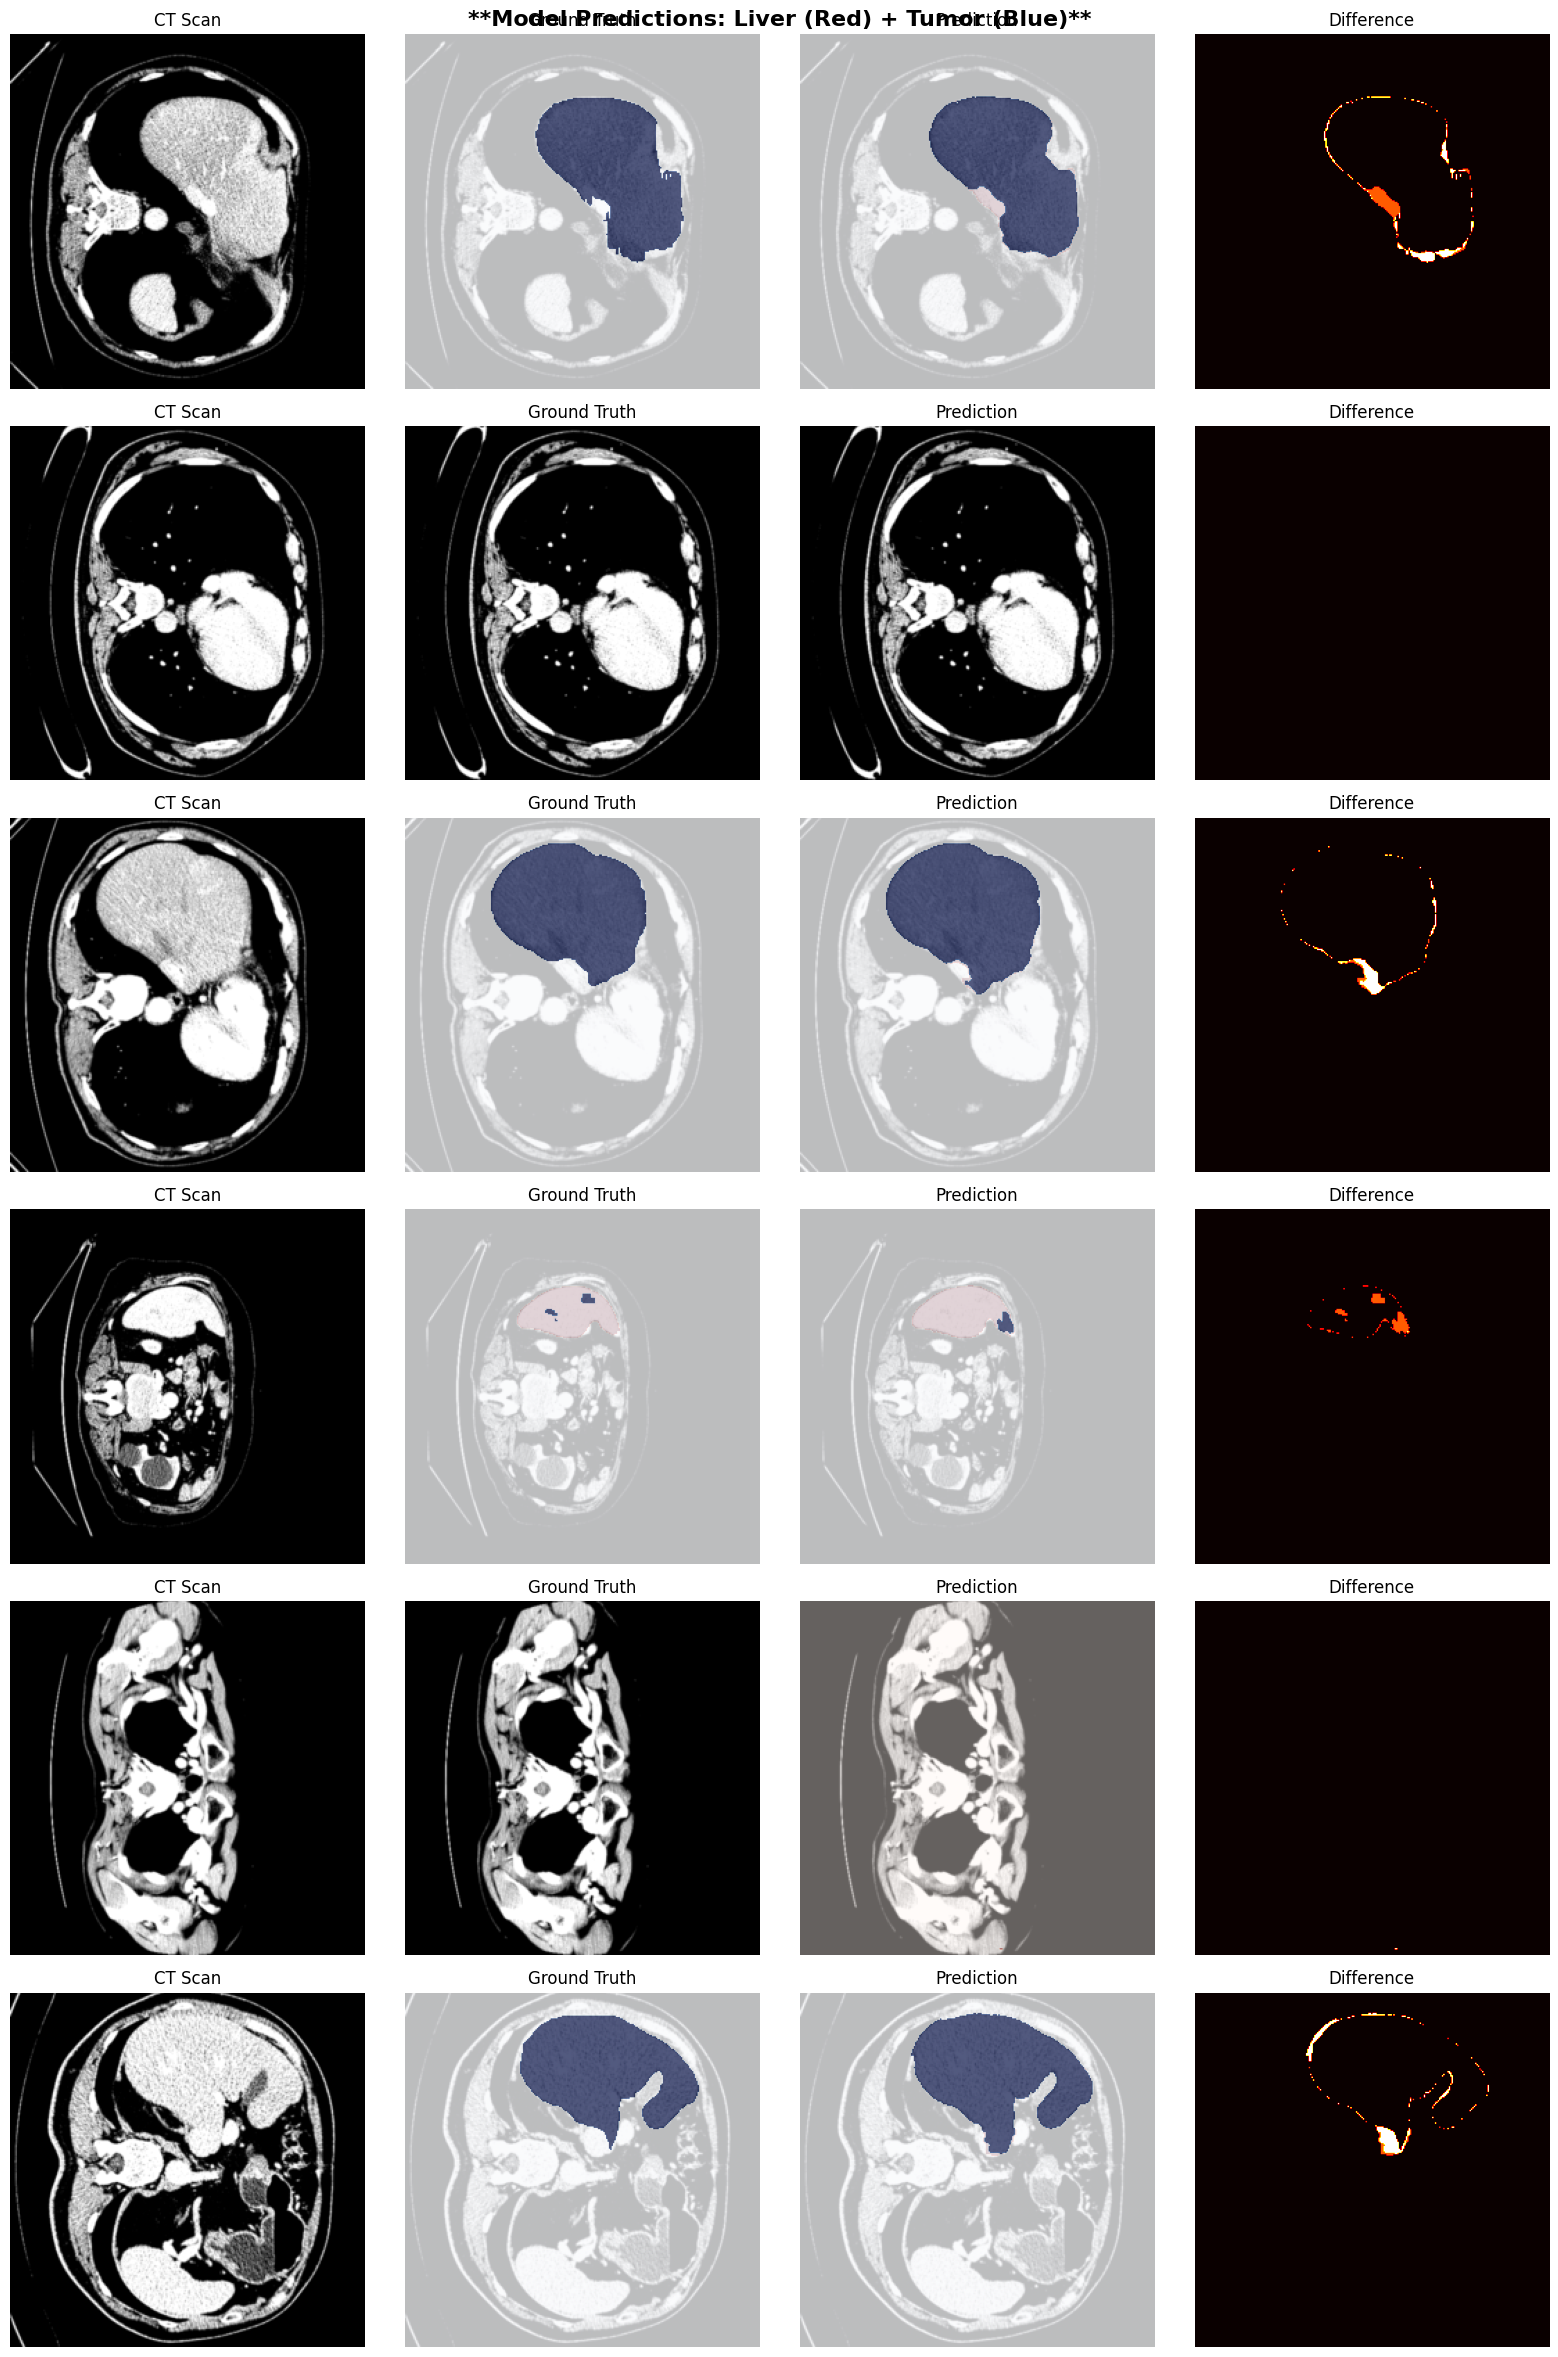

In [7]:
visualize_model_predictions(model, val_loader, DEVICE)